This notebook is for evaluating existing features on redundancy/irrelevancy by preliminary graph analysis of feature value distributions, and if necessary, transforming the distributions. Majority of methods used in this notebook is based on:

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
other resources:

intro to feature selection: https://quantdare.com/what-is-the-difference-between-feature-extraction-and-feature-selection/
feature selection method: https://www.datacamp.com/community/tutorials/feature-selection-python
feature selection tools: https://scikit-learn.org/stable/modules/feature_selection.html
graph usage in representing data: https://365datascience.com/chart-types-and-how-to-select-the-right-one/
Issues:

"The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations." reliability have 2 discrete categories (reliable and unreliable), how to do bivariate analysis? can't use scatter plot. heat map doesn't seem to work?

# Setting up

In [2]:
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#increase size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import feature set as dataframe

In [114]:
news_reliable = pd.read_csv('./news_FE.csv', sep=',')
news_unreliable = pd.read_csv('./text_FE.csv', sep=',')
news_multi = pd.read_csv('./multisourced_FE.csv', sep=',')

In [115]:
news_reliable.columns
news_unreliable.columns
news_multi.columns

Index(['Unnamed: 0', 'Statement', '# of Characters', '# of Words',
       '# of Verbs', '# of Noun', '# of Sentence',
       'Average # of Words per Sentence', 'Average # of Characters per Words',
       '# of Question Marks', '% of Subjective Verbs', '% of Passive Voice',
       '% of Positive Words', '% of Negative Words', '# of Unique Wrods/Terms',
       '# of Misspelled Words', '# of Causation Terms',
       '% of generalizing terms', '% of # and quantifiers',
       '1st person pronouns', '2nd and 3rd person pronouns', 'Exclusive term',
       '# of exclamation marks', 'Lexical', 'Singular pronouns(1st person)',
       'Group ref pronouns(1st person)', '2nd 3rd pronouns'],
      dtype='object')

Index(['Unnamed: 0', 'Statement', '# of Characters', '# of Words',
       '# of Verbs', '# of Noun', '# of Sentence',
       'Average # of Words per Sentence', 'Average # of Characters per Words',
       '# of Question Marks', '% of Subjective Verbs', '% of Passive Voice',
       '% of Positive Words', '% of Negative Words', '# of Unique Wrods/Terms',
       '# of Misspelled Words', '# of Causation Terms',
       '% of generalizing terms', '% of # and quantifiers',
       '1st person pronouns', '2nd and 3rd person pronouns', 'Exclusive term',
       '# of exclamation marks', 'Lexical', 'Singular pronouns(1st person)',
       'Group ref pronouns(1st person)', '2nd 3rd pronouns'],
      dtype='object')

Index(['Unnamed: 0', 'TEXT', 'REFERENCE', '# of Characters - sub',
       '# of Words - sub', '# of Verbs - sub', '# of Noun - sub',
       '# of Sentence - sub', 'Average # of Words per Sentence - sub',
       'Average # of Characters per Words - sub', '# of Question Marks - sub',
       '% of Subjective Verbs - sub', '% of Passive Voice - sub',
       '% of Positive Words - sub', '% of Negative Words - sub',
       '# of Unique Wrods/Terms - sub', '# of Misspelled Words - sub',
       '# of Causation Terms - sub', '% of generalizing terms - sub',
       '% of # and quantifiers - sub', '1st person pronouns - sub',
       '2nd and 3rd person pronouns - sub', 'Exclusive term - sub',
       '# of exclamation marks - sub', 'Lexical - sub',
       'Singular pronouns(1st person) - sub',
       'Group ref pronouns(1st person) - sub', '2nd 3rd pronouns - sub',
       '# of Characters - avg sub', '# of Words - avg sub',
       '# of Verbs - avg sub', '# of Noun - avg sub',
       '# of Sentenc

In [116]:
news_reliable.head(n=1)
news_unreliable.head(n=1)
news_multi.head(n=1)

Unnamed: 0                                          Statement  \
0           0  Apple is temporarily closing all of its stores...   

   # of Characters  # of Words  # of Verbs  # of Noun  # of Sentence  \
0               78          15           2          5              2   

   Average # of Words per Sentence  Average # of Characters per Words  \
0                             15.0                                5.2   

   # of Question Marks  ...  % of generalizing terms  % of # and quantifiers  \
0                    0  ...                        0                       0   

   1st person pronouns  2nd and 3rd person pronouns  Exclusive term  \
0                    0                            0               0   

   # of exclamation marks  Lexical  Singular pronouns(1st person)  \
0                       0       13                              0   

   Group ref pronouns(1st person)  2nd 3rd pronouns  
0                               0                 0  

[1 rows x 27 columns]

Unnamed: 0                                          Statement  \
0           0  Coronaviruses caused SARS, MERS, and the curre...   

   # of Characters  # of Words  # of Verbs  # of Noun  # of Sentence  \
0              150          28           7          9              3   

   Average # of Words per Sentence  Average # of Characters per Words  \
0                             14.0                           5.357143   

   # of Question Marks  ...  % of generalizing terms  % of # and quantifiers  \
0                    0  ...                        0                       0   

   1st person pronouns  2nd and 3rd person pronouns  Exclusive term  \
0                    0                            0               0   

   # of exclamation marks  Lexical  Singular pronouns(1st person)  \
0                       0       21                              0   

   Group ref pronouns(1st person)  2nd 3rd pronouns  
0                               0                 0  

[1 rows x 27 columns]

Unnamed: 0                                               TEXT  \
0           0  Coronaviruses caused SARS, MERS, and the curre...   

                                           REFERENCE  # of Characters - sub  \
0  Apple is temporarily closing all of its stores...                  -72.0   

   # of Words - sub  # of Verbs - sub  # of Noun - sub  # of Sentence - sub  \
0             -13.0              -5.0             -4.0                 -1.0   

   Average # of Words per Sentence - sub  \
0                                    1.0   

   Average # of Characters per Words - sub  ...  \
0                                    -0.16  ...   

   % of generalizing terms - avg sub  % of # and quantifiers - avg sub  \
0                                0.0                             -0.47   

   1st person pronouns - avg sub  2nd and 3rd person pronouns - avg sub  \
0                          -0.01                                  -0.03   

   Exclusive term - avg sub  # of exclamation marks - avg sub  \
0                       0.0                               0.0   

   Lexical - avg sub  Singular pronouns(1st person) - avg sub  \
0              -6.26                                    -0.17   

   Group ref pronouns(1st person) - avg sub  2nd 3rd pronouns - avg sub  
0                                     -0.11                         0.0  

[1 rows x 53 columns]

In [117]:
news_reliable.describe()
news_unreliable.describe()
news_multi.describe()

Unnamed: 0  # of Characters  # of Words  # of Verbs  # of Noun  \
count   98.000000        98.000000   98.000000   98.000000  98.000000   
mean    48.500000       174.836735   34.061224    3.551020  16.734694   
std     28.434134        39.417850    8.534728    2.261841   6.467286   
min      0.000000        73.000000   15.000000    0.000000   3.000000   
25%     24.250000       147.000000   28.000000    2.000000  12.000000   
50%     48.500000       179.000000   35.500000    3.000000  16.500000   
75%     72.750000       212.750000   41.000000    5.000000  20.750000   
max     97.000000       222.000000   52.000000    9.000000  30.000000   

       # of Sentence  Average # of Words per Sentence  \
count      98.000000                        98.000000   
mean        2.428571                        23.561054   
std         0.885158                         9.355125   
min         1.000000                         7.600000   
25%         2.000000                        15.375000   
50%         2.000000                        21.500000   
75%         3.000000                        30.000000   
max         6.000000                        44.000000   

       Average # of Characters per Words  # of Question Marks  \
count                          98.000000            98.000000   
mean                            5.182624             0.051020   
std                             0.441321             0.263695   
min                             4.019231             0.000000   
25%                             4.924015             0.000000   
50%                             5.210591             0.000000   
75%                             5.411932             0.000000   
max                             6.375000             2.000000   

       % of Subjective Verbs  ...  % of generalizing terms  \
count              98.000000  ...                     98.0   
mean                0.666100  ...                      0.0   
std                 3.426704  ...                      0.0   
min                 0.000000  ...                      0.0   
25%                 0.000000  ...                      0.0   
50%                 0.000000  ...                      0.0   
75%                 0.000000  ...                      0.0   
max                25.000000  ...                      0.0   

       % of # and quantifiers  1st person pronouns  \
count               98.000000            98.000000   
mean                 0.469388             0.010204   
std                  0.899073             0.101015   
min                  0.000000             0.000000   
25%                  0.000000             0.000000   
50%                  0.000000             0.000000   
75%                  1.000000             0.000000   
max                  4.000000             1.000000   

       2nd and 3rd person pronouns  Exclusive term  # of exclamation marks  \
count                    98.000000            98.0                    98.0   
mean                      0.030612             0.0                     0.0   
std                       0.173150             0.0                     0.0   
min                       0.000000             0.0                     0.0   
25%                       0.000000             0.0                     0.0   
50%                       0.000000             0.0                     0.0   
75%                       0.000000             0.0                     0.0   
max                       1.000000             0.0                     0.0   

         Lexical  Singular pronouns(1st person)  \
count  98.000000                      98.000000   
mean   27.255102                       0.173469   
std     6.574413                       0.454655   
min    13.000000                       0.000000   
25%    22.250000                       0.000000   
50%    28.000000                       0.000000   
75%    32.000000                       0.000000   
max    41.000000                       3.000000   

       Group ref pronouns(1st person)  2

Unnamed: 0  # of Characters  # of Words  # of Verbs   # of Noun  \
count  100.000000       100.000000  100.000000  100.000000  100.000000   
mean    49.500000       144.460000   27.260000    5.080000    9.970000   
std     29.011492        49.269701    9.644824    2.312373    4.613233   
min      0.000000        41.000000    7.000000    1.000000    2.000000   
25%     24.750000       109.000000   21.000000    3.000000    7.000000   
50%     49.500000       138.500000   26.000000    5.000000    9.000000   
75%     74.250000       187.750000   34.000000    7.000000   12.000000   
max     99.000000       223.000000   46.000000   11.000000   24.000000   

       # of Sentence  Average # of Words per Sentence  \
count     100.000000                       100.000000   
mean        2.230000                        20.761667   
std         0.708605                         8.959669   
min         1.000000                         4.000000   
25%         2.000000                        13.916667   
50%         2.000000                        20.750000   
75%         3.000000                        26.000000   
max         4.000000                        43.000000   

       Average # of Characters per Words  # of Question Marks  \
count                         100.000000           100.000000   
mean                            5.353707             0.030000   
std                             0.459774             0.171447   
min                             4.333333             0.000000   
25%                             5.062326             0.000000   
50%                             5.361498             0.000000   
75%                             5.666667             0.000000   
max                             6.571429             1.000000   

       % of Subjective Verbs  ...  % of generalizing terms  \
count             100.000000  ...                    100.0   
mean                1.012302  ...                      0.0   
std                 4.486145  ...                      0.0   
min                 0.000000  ...                      0.0   
25%                 0.000000  ...                      0.0   
50%                 0.000000  ...                      0.0   
75%                 0.000000  ...                      0.0   
max                33.333333  ...                      0.0   

       % of # and quantifiers  1st person pronouns  \
count              100.000000                100.0   
mean                 0.550000                  0.0   
std                  0.903137                  0.0   
min                  0.000000                  0.0   
25%                  0.000000                  0.0   
50%                  0.000000                  0.0   
75%                  1.000000                  0.0   
max                  5.000000                  0.0   

       2nd and 3rd person pronouns  Exclusive term  # of exclamation marks  \
count                   100.000000           100.0                   100.0   
mean                      0.020000             0.0                     0.0   
std                       0.140705             0.0                     0.0   
min                       0.000000             0.0                     0.0   
25%                       0.000000             0.0                     0.0   
50%                       0.000000             0.0                     0.0   
75%                       0.000000             0.0                     0.0   
max                       1.000000             0.0                     0.0   

          Lexical  Singular pronouns(1st person)  \
count  100.000000                     100.000000   
mean    22.870000                       0.130000   
std      7.179734                       0.393251   
min      7.000000                       0.000000   
25%     18.000000                       0.000000   
50%     22.000000                       0.000000   
75%     28.000000                       0.000000   
max     40.000000                       2.000000   

       Group ref prono

Unnamed: 0  # of Characters - sub  # of Words - sub  # of Verbs - sub  \
count   98.000000              98.000000         98.000000         98.000000   
mean    48.500000              29.408163          6.602041         -1.551020   
std     28.434134              69.423820         14.087898          3.239965   
min      0.000000            -124.000000        -23.000000         -8.000000   
25%     24.250000             -15.250000         -3.500000         -3.000000   
50%     48.500000              36.000000          8.500000         -2.000000   
75%     72.750000              78.500000         16.000000          0.000000   
max     97.000000             176.000000         40.000000          8.000000   

       # of Noun - sub  # of Sentence - sub  \
count        98.000000            98.000000   
mean          6.704082             0.214286   
std           9.155258             1.194921   
min         -14.000000            -2.000000   
25%          -0.750000            -0.750000   
50%           8.000000             0.000000   
75%          12.000000             1.000000   
max          28.000000             4.000000   

       Average # of Words per Sentence - sub  \
count                              98.000000   
mean                                2.579898   
std                                13.413165   
min                               -30.200000   
25%                                -7.500000   
50%                                 5.000000   
75%                                13.000000   
max                                34.000000   

       Average # of Characters per Words - sub  # of Question Marks - sub  \
count                                98.000000                  98.000000   
mean                                 -0.166735                   0.020408   
std                                   0.600755                   0.247861   
min                                  -1.700000                  -1.000000   
25%                                  -0.480000                   0.000000   
50%                                  -0.210000                   0.000000   
75%                                   0.277500                   0.000000   
max                                   1.820000                   1.000000   

       % of Subjective Verbs - sub  ...  % of generalizing terms - avg sub  \
count                    98.000000  ...                               98.0   
mean                     -0.366837  ...                                0.0   
std                       5.800958  ...                                0.0   
min                     -33.330000  ...                                0.0   
25%                       0.000000  ...                                0.0   
50%                       0.000000  ...                                0.0   
75%                       0.000000  ...                                0.0   
max                      25.000000  ...                                0.0   

       % of # and quantifiers - avg sub  1st person pronouns - avg sub  \
count                         98.000000                   9.800000e+01   
mean                           0.091224                  -1.000000e-02   
std                            0.908906                   6.974570e-18   
min                           -0.470000                  -1.000000e-02   
25%                           -0.470000                  -1.000000e-02   
50%                           -0.470000                  -1.000000e-02   
75%                            0.530000                  -1.000000e-02   
max                            4.530000                  -1.000000e-02   

       2nd and 3rd person pronouns - avg sub  Exclusive term - avg sub  \
count                              98.000000                      98.0   
mean                               -0.009592                       0.0   
std                                 0.142119                       0.0   
min                                -0.030000                       0.

# Feature data pre-processing

<h2>Data cleaning <!h2>

In [118]:
#categorize reliability to each entry, and concatenating reliable and unreliable feature sets into one 
#dummy variables for easy instance selection
news_multi['reliability'] = 2
news_reliable['reliability'] = 1
news_unreliable['reliability'] = 0
news_all = pd.concat([news_reliable, news_unreliable], axis=0)
#analysis of missing data, counting nulls
total_sin = news_all.isnull().sum().sort_values(ascending=False)
percent_sin = (news_all.isnull().sum()/news_all.isnull().count()).sort_values(ascending=False)
missing_data_sin = pd.concat([total_sin, percent_sin], axis=1, keys=['Total', 'Percent'])
missing_data_sin.head(20)
news_all.dtypes

Total  Percent
reliability                            0      0.0
2nd 3rd pronouns                       0      0.0
Statement                              0      0.0
# of Characters                        0      0.0
# of Words                             0      0.0
# of Verbs                             0      0.0
# of Noun                              0      0.0
# of Sentence                          0      0.0
Average # of Words per Sentence        0      0.0
Average # of Characters per Words      0      0.0
# of Question Marks                    0      0.0
% of Subjective Verbs                  0      0.0
% of Passive Voice                     0      0.0
% of Positive Words                    0      0.0
% of Negative Words                    0      0.0
# of Unique Wrods/Terms                0      0.0
# of Misspelled Words                  0      0.0
# of Causation Terms                   0      0.0
% of generalizing terms                0      0.0
% of # and quantifiers                 0      0.0

Unnamed: 0                             int64
Statement                             object
# of Characters                        int64
# of Words                             int64
# of Verbs                             int64
# of Noun                              int64
# of Sentence                          int64
Average # of Words per Sentence      float64
Average # of Characters per Words    float64
# of Question Marks                    int64
% of Subjective Verbs                float64
% of Passive Voice                   float64
% of Positive Words                  float64
% of Negative Words                  float64
# of Unique Wrods/Terms                int64
# of Misspelled Words                  int64
# of Causation Terms                   int64
% of generalizing terms                int64
% of # and quantifiers                 int64
1st person pronouns                    int64
2nd and 3rd person pronouns            int64
Exclusive term                         int64
# of excla

In [119]:
#categorize reliability to each entry, and concatenating reliable and unreliable feature sets into one 
#dummy variables for easy instance selection
news_multi['reliability'] = 2
#analysis of missing data, counting nulls for multi sourced features
total_mul = news_multi.isnull().sum().sort_values(ascending=False)
percent_mul = (news_multi.isnull().sum()/news_multi.isnull().count()).sort_values(ascending=False)
missing_data_mul = pd.concat([total_mul, percent_mul], axis=1, keys=['Total', 'Percent'])
missing_data_mul.head(20)
news_multi.dtypes.head(20)

Total  Percent
reliability                                  0      0.0
% of Positive Words - sub                    0      0.0
Lexical - sub                                0      0.0
# of exclamation marks - sub                 0      0.0
Exclusive term - sub                         0      0.0
2nd and 3rd person pronouns - sub            0      0.0
1st person pronouns - sub                    0      0.0
% of # and quantifiers - sub                 0      0.0
% of generalizing terms - sub                0      0.0
# of Causation Terms - sub                   0      0.0
# of Misspelled Words - sub                  0      0.0
# of Unique Wrods/Terms - sub                0      0.0
% of Negative Words - sub                    0      0.0
% of Passive Voice - sub                     0      0.0
2nd 3rd pronouns - avg sub                   0      0.0
% of Subjective Verbs - sub                  0      0.0
# of Question Marks - sub                    0      0.0
Average # of Characters per Words - sub      0      0.0
Average # of Words per Sentence - sub        0      0.0
# of Sentence - sub                          0      0.0

Unnamed: 0                                   int64
TEXT                                        object
REFERENCE                                   object
# of Characters - sub                      float64
# of Words - sub                           float64
# of Verbs - sub                           float64
# of Noun - sub                            float64
# of Sentence - sub                        float64
Average # of Words per Sentence - sub      float64
Average # of Characters per Words - sub    float64
# of Question Marks - sub                  float64
% of Subjective Verbs - sub                float64
% of Passive Voice - sub                   float64
% of Positive Words - sub                  float64
% of Negative Words - sub                  float64
# of Unique Wrods/Terms - sub              float64
# of Misspelled Words - sub                float64
# of Causation Terms - sub                 float64
% of generalizing terms - sub              float64
% of # and quantifiers - sub   

In [120]:
#dropping feature from feature set with missing data past a threshold
news_all = news_all.drop((missing_data_sin[missing_data_sin['Percent'] > 0.5]).index,1)
news_multi = news_multi.drop((missing_data_mul[missing_data_mul['Percent'] > 0.5]).index,1)
#removing observations from feature set that only has a few missing data
news_all = news_all.drop(news_all.loc[news_all['Unnamed: 0'].isnull()].index)
news_multi = news_multi.drop(news_multi.loc[news_multi['Unnamed: 0'].isnull()].index)
#removes all rows containing NaN
news_all.dropna(inplace=True)
news_all.isnull().sum().max() #check if any nulls left in set

0

# graph analysis of feature values

<h2> Univariate analysis </h2>

In [121]:
#standardizing feature
def feature_standard(feature):
    print("standardization result analysis of \033[1m"+var+"\033[0;0m :") # bold text    
    try:
        feature_scaled = StandardScaler().fit_transform(news_all[var][:,np.newaxis]);
    except:
        feature_scaled = StandardScaler().fit_transform(news_multi[var][:,np.newaxis]);
    low_range = feature_scaled[feature_scaled[:,0].argsort()][:10]
    high_range = feature_scaled[feature_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    print(low_range)
    print('\nouter range (high) of the distribution:')
    print(high_range)
    print()

In [122]:
# graphing distributions of feature values
def feature_distrib(feature):
    fig, ax =plt.subplots(1,2)
    try:
        #histogram
        sns.distplot(news_all[var], ax=ax[0]).set_title("For "+feature+" : "
                                                        +"Skewness: %f" % news_all[var].skew()
                                                        +" Kurtosis: %f" % news_all[var].kurt())
        #box plot feature x/reliability
        sns.boxplot(x='reliability', y=var, data=news_all, ax=ax[1])
    except:
        #histogram
        sns.distplot(news_multi[var], ax=ax[0]).set_title("For "+feature+" : "
                                                        +"Skewness: %f" % news_multi[var].skew()
                                                        +" Kurtosis: %f" % news_multi[var].kurt())
        #box plot feature x/reliability
        sns.boxplot(x='reliability', y=var, data=news_multi, ax=ax[1])
    
    fig.show()
    #probability plot
    fig = plt.figure()
    try:
        res = stats.probplot(news_all[var], plot=plt)
    except:
        res = stats.probplot(news_multi[var], plot=plt)

In [123]:
#list of features to analyze
feature_list_SSF = [e for e in (list(news_all)) if e not in ('Unnamed: 0','Statement','reliability')]
feature_list_MSF = [e for e in (list(news_multi)) if e not in ('Unnamed: 0','TEXT', 'REFERENCE', 'reliability')]

In [124]:
for var in feature_list_SSF:
    feature_standard(var)

standardization result analysis of # of Characters :
outer range (low) of the distribution:
[[-2.52310961]
 [-2.41664475]
 [-2.39535178]
 [-2.01207829]
 [-1.99078532]
 [-1.96949235]
 [-1.9269064 ]
 [-1.9269064 ]
 [-1.84173452]
 [-1.75656263]]

outer range (high) of the distribution:
[[1.28833233]
 [1.28833233]
 [1.3096253 ]
 [1.3096253 ]
 [1.3096253 ]
 [1.3096253 ]
 [1.3096253 ]
 [1.33091827]
 [1.33091827]
 [1.35221125]]

standardization result analysis of # of Words :
outer range (low) of the distribution:
[[-2.43998876]
 [-2.43998876]
 [-2.33671433]
 [-2.02689105]
 [-2.02689105]
 [-1.92361662]
 [-1.92361662]
 [-1.71706776]
 [-1.71706776]
 [-1.61379333]]

outer range (high) of the distribution:
[[1.38116508]
 [1.4844395 ]
 [1.4844395 ]
 [1.58771393]
 [1.58771393]
 [1.58771393]
 [1.79426279]
 [1.89753722]
 [2.00081164]
 [2.2073605 ]]

standardization result analysis of # of Verbs :
outer range (low) of the distribution:
[[-1.80068921]
 [-1.80068921]
 [-1.80068921]
 [-1.80068921]
 [-1.8

In [125]:
for var in feature_list_MSF:
    feature_standard(var)

standardization result analysis of # of Characters - sub :
outer range (low) of the distribution:
[[-2.22109501]
 [-2.20661667]
 [-1.98944163]
 [-1.80122325]
 [-1.77226658]
 [-1.71435323]
 [-1.6998749 ]
 [-1.65643989]
 [-1.64196155]
 [-1.48269985]]

outer range (high) of the distribution:
[[1.18131407]
 [1.38401078]
 [1.45640246]
 [1.52879414]
 [1.55775082]
 [1.64462084]
 [1.67357751]
 [1.77492586]
 [2.09344927]
 [2.12240594]]

standardization result analysis of # of Words - sub :
outer range (low) of the distribution:
[[-2.11204241]
 [-1.96934668]
 [-1.89799881]
 [-1.89799881]
 [-1.82665095]
 [-1.75530308]
 [-1.75530308]
 [-1.68395522]
 [-1.54125949]
 [-1.54125949]]

outer range (high) of the distribution:
[[1.16995938]
 [1.31265511]
 [1.38400297]
 [1.5266987 ]
 [1.59804657]
 [1.66939443]
 [1.7407423 ]
 [1.81209016]
 [1.81209016]
 [2.38287308]]

standardization result analysis of # of Verbs - sub :
outer range (low) of the distribution:
[[-2.00068133]
 [-2.00068133]
 [-2.00068133]
 [-

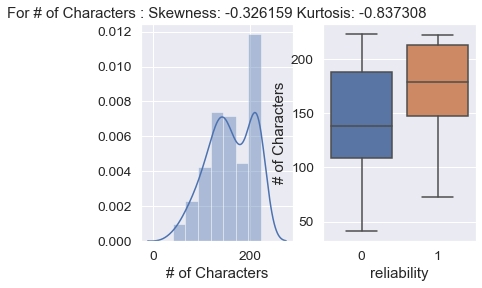

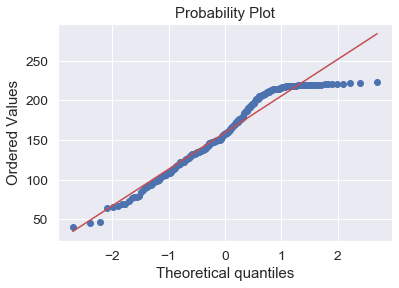

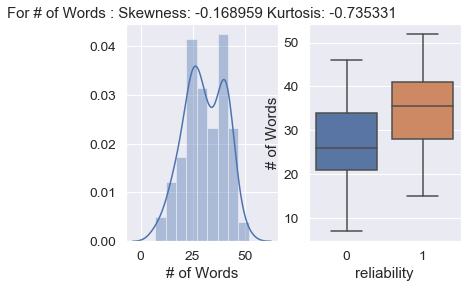

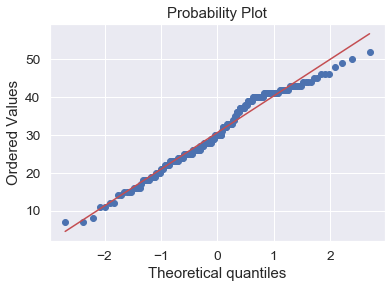

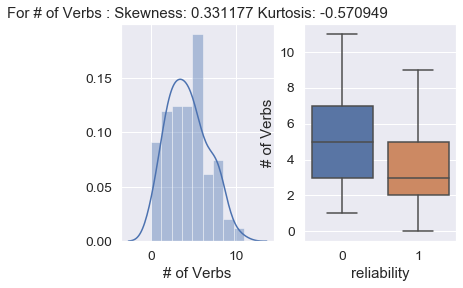

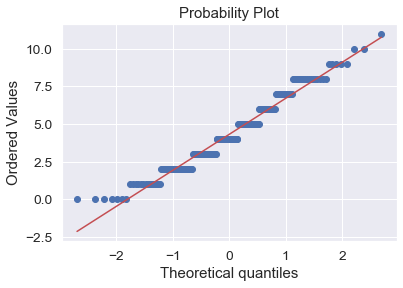

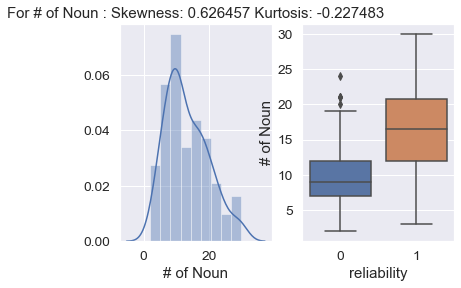

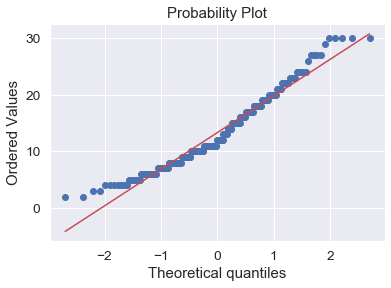

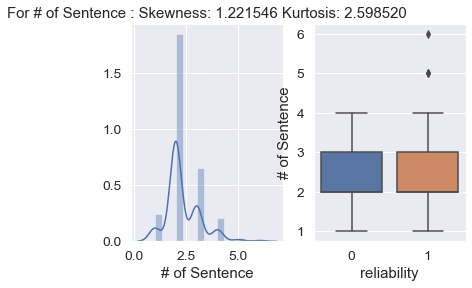

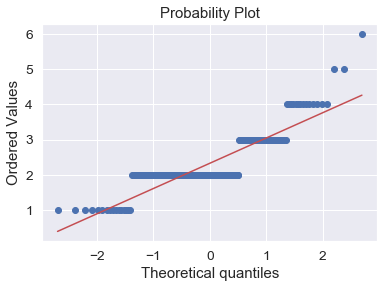

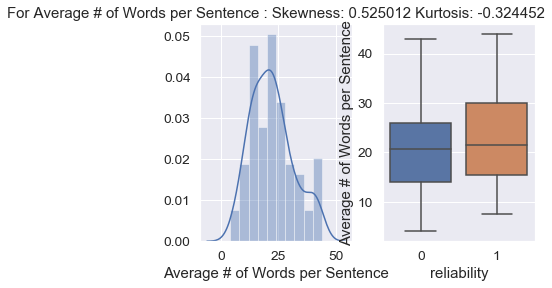

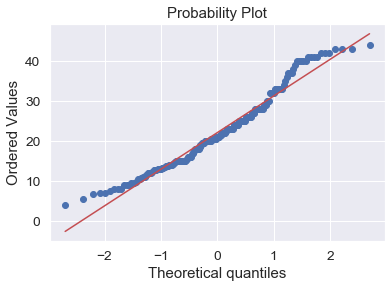

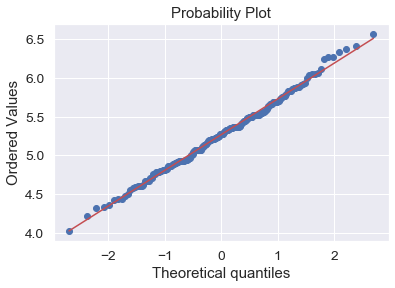

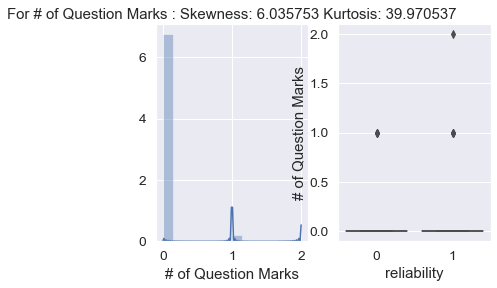

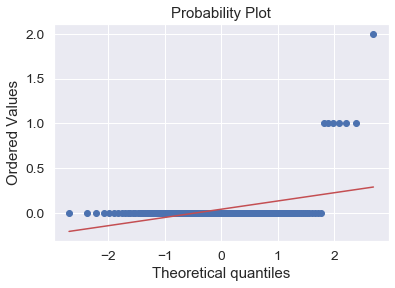

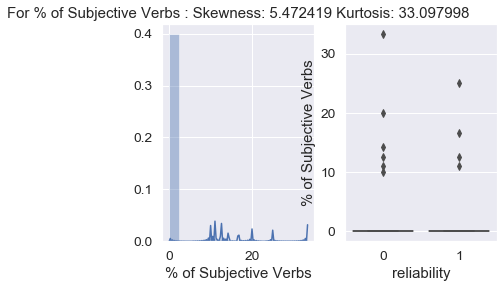

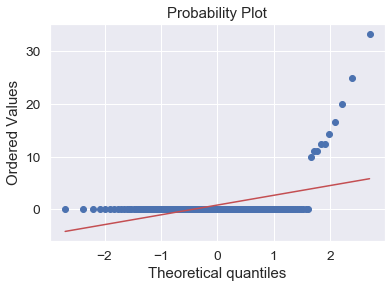

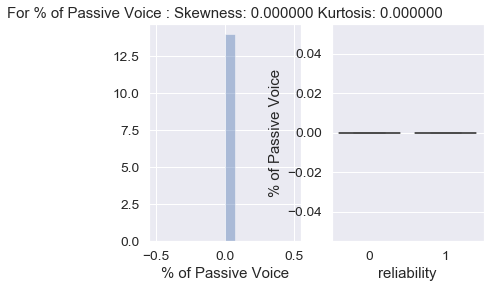

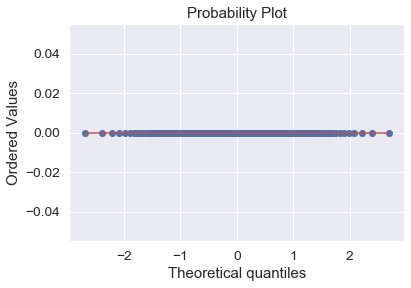

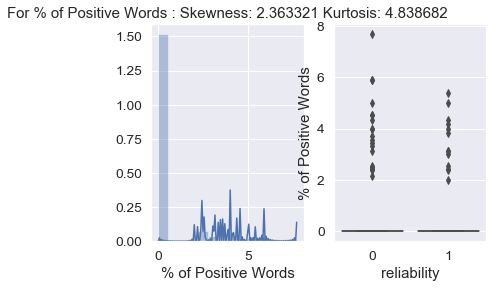

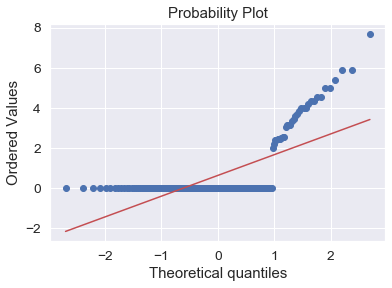

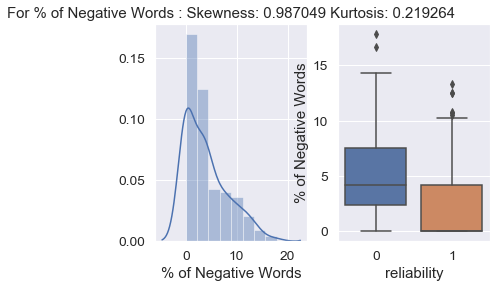

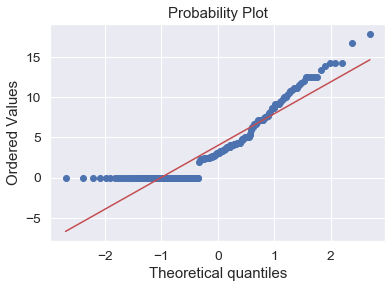

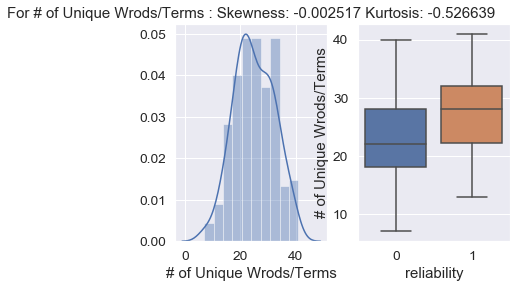

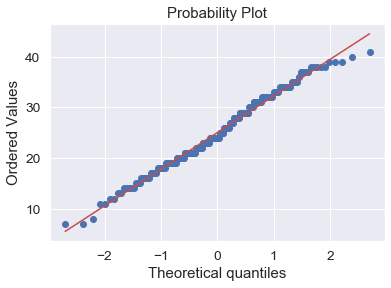

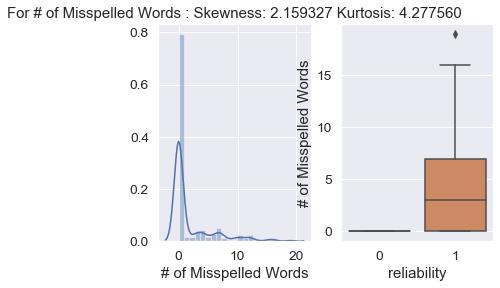

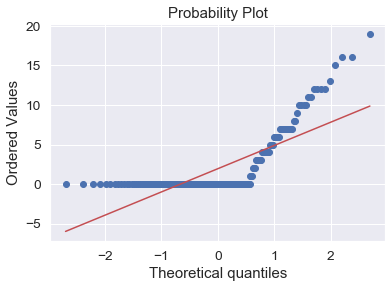

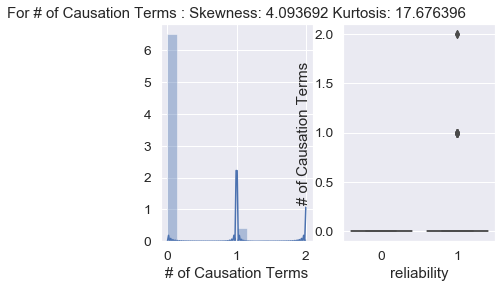

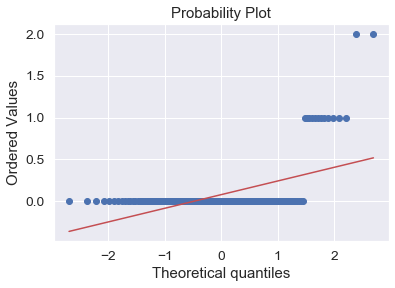

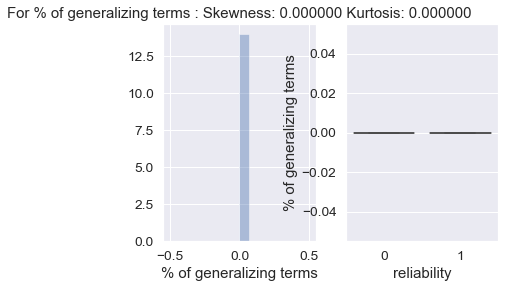

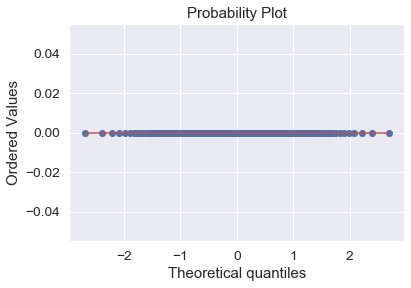

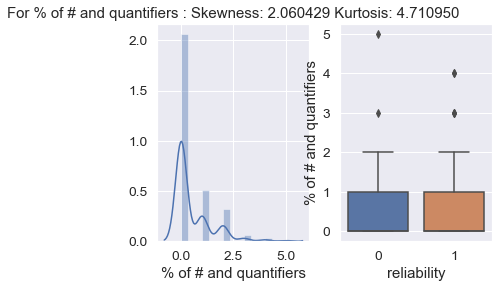

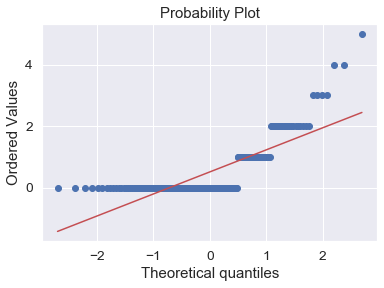

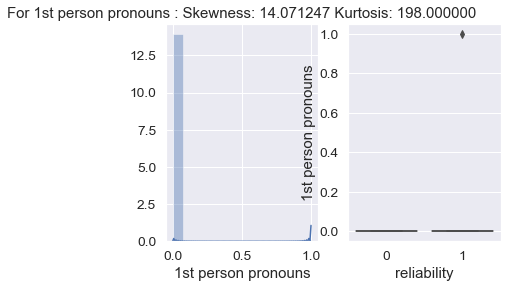

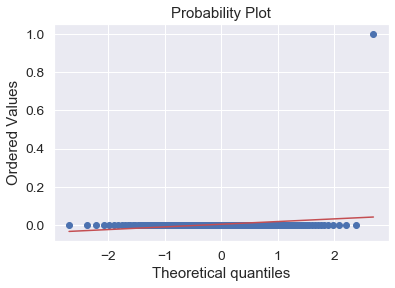

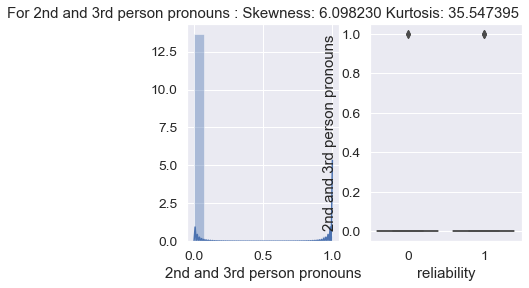

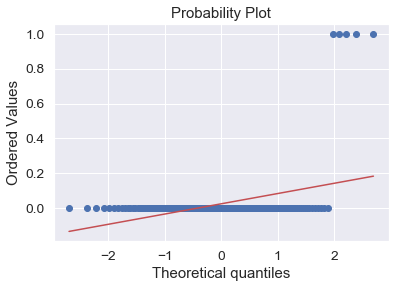

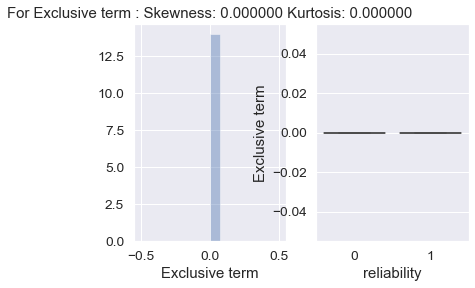

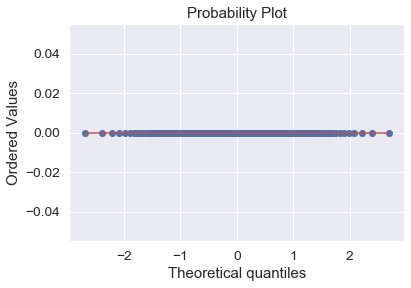

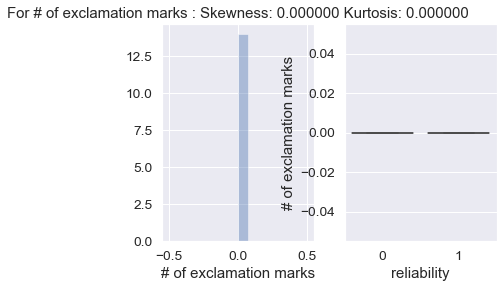

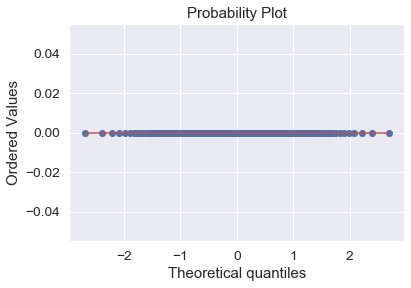

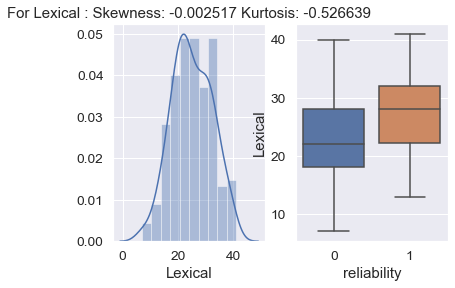

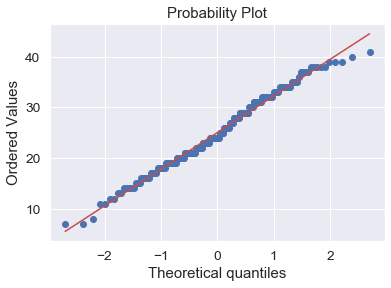

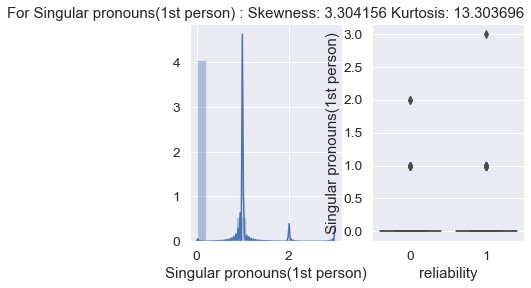

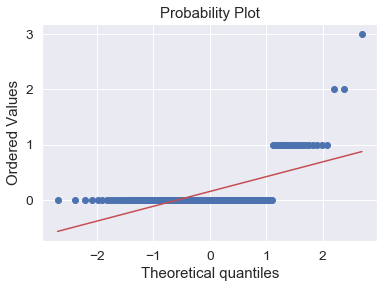

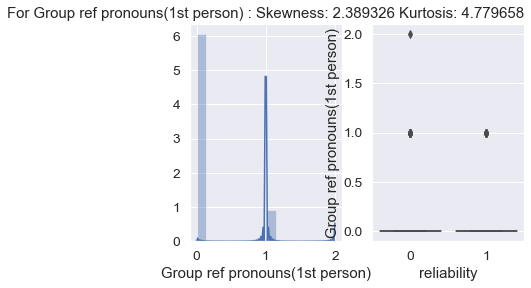

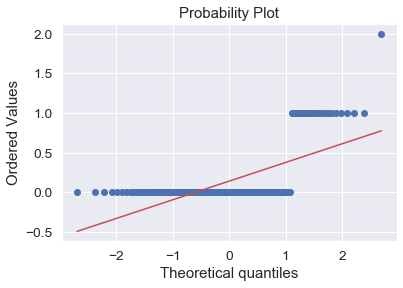

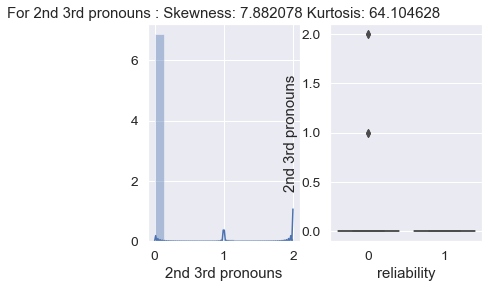

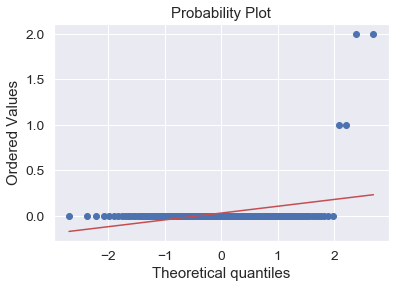

In [126]:
for var in feature_list_SSF:
    feature_distrib(var)

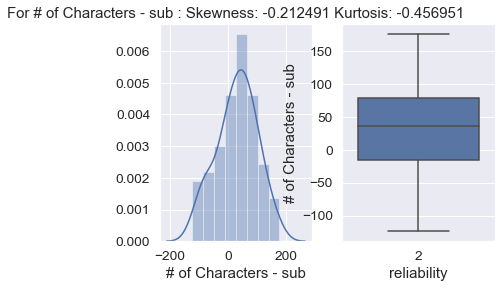

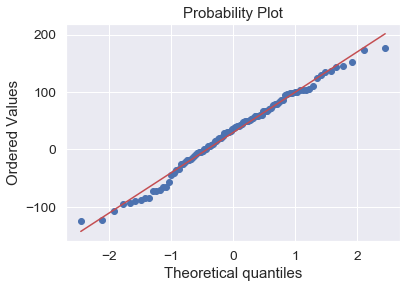

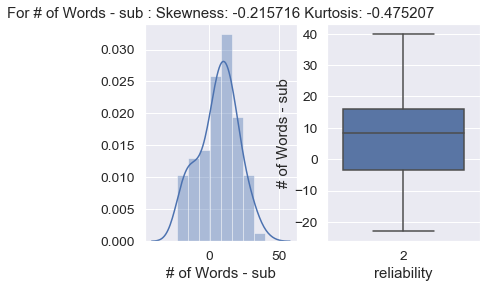

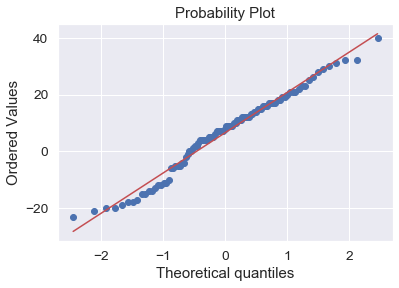

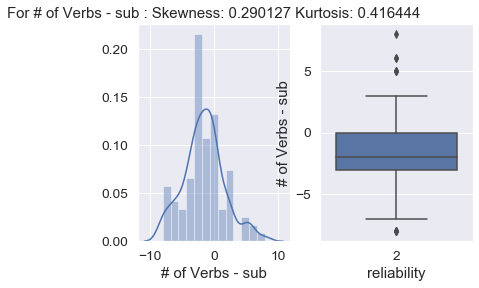

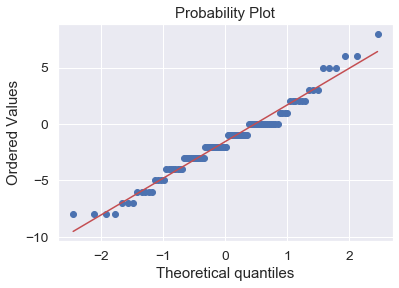

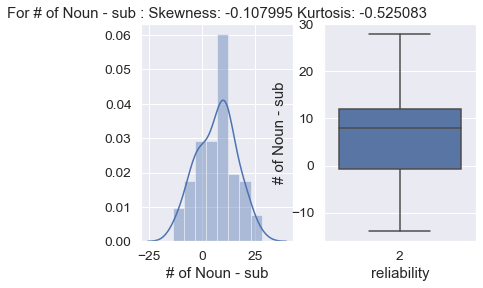

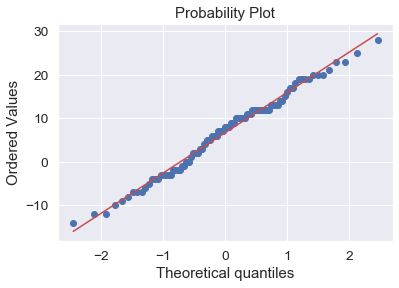

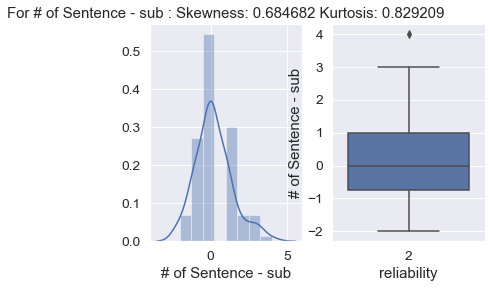

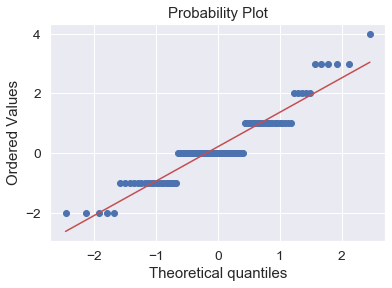

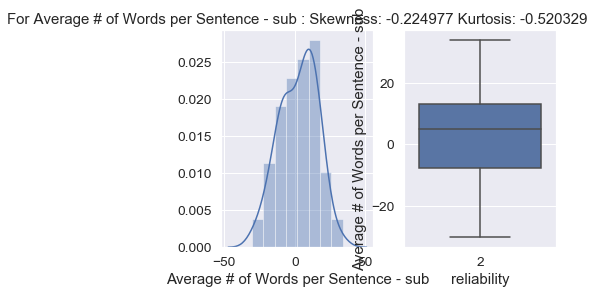

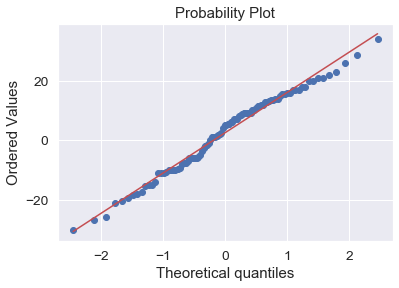

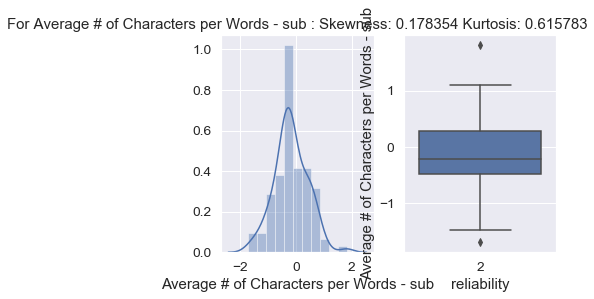

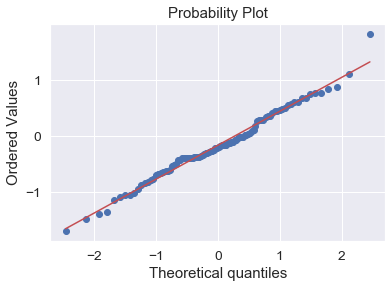

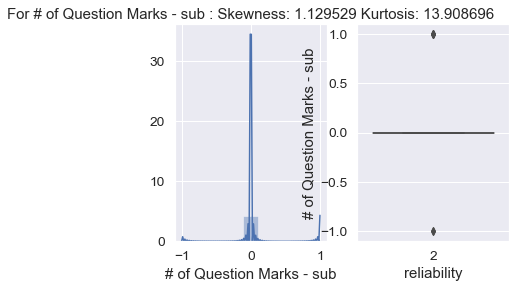

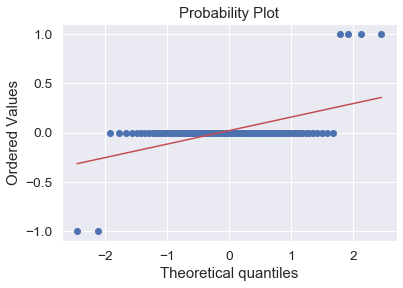

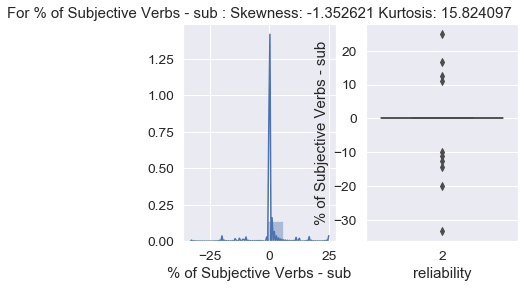

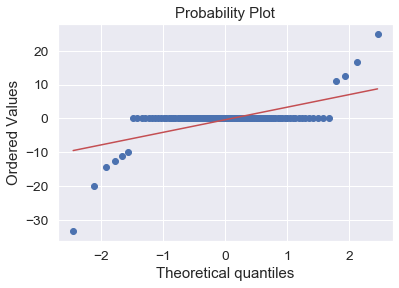

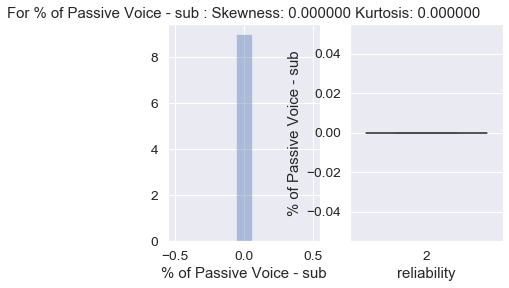

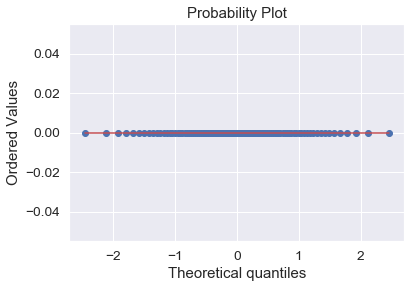

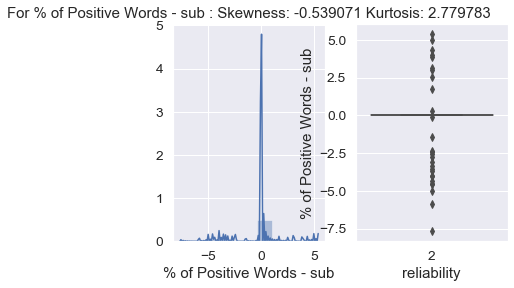

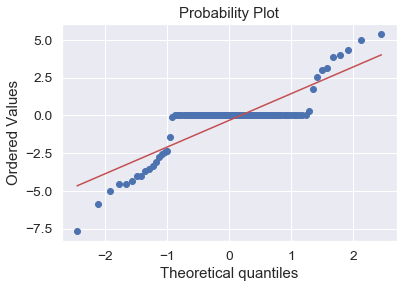

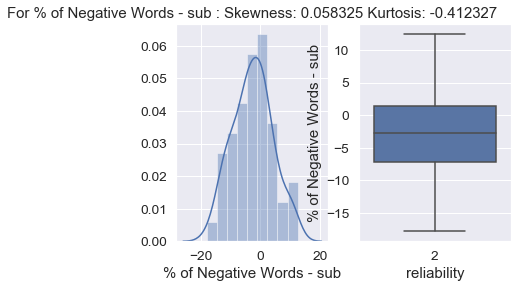

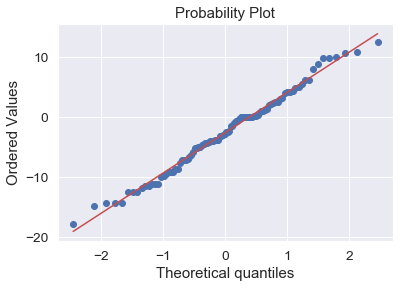

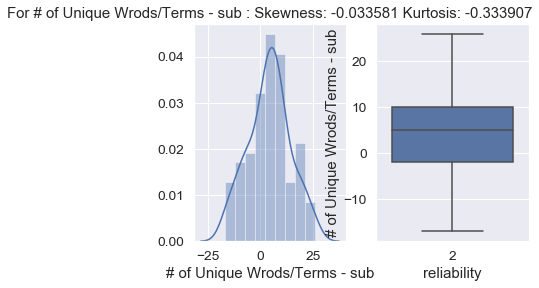

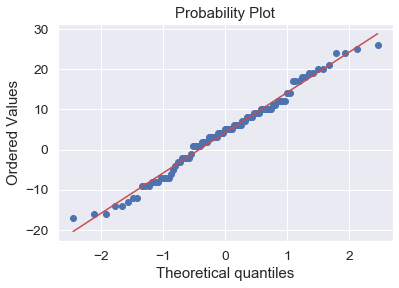

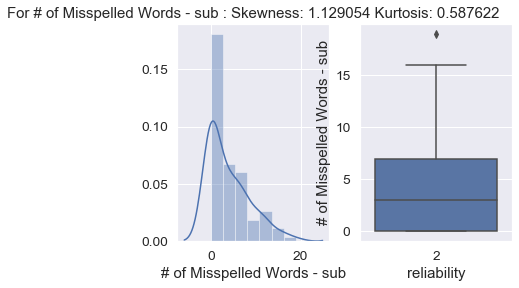

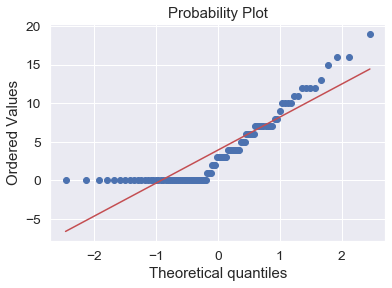

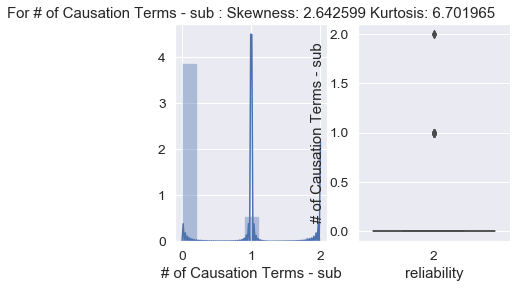

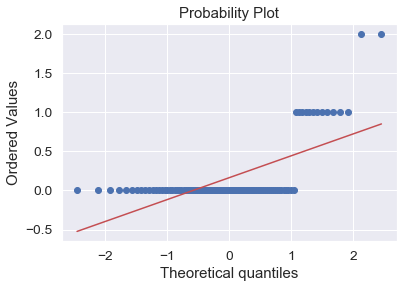

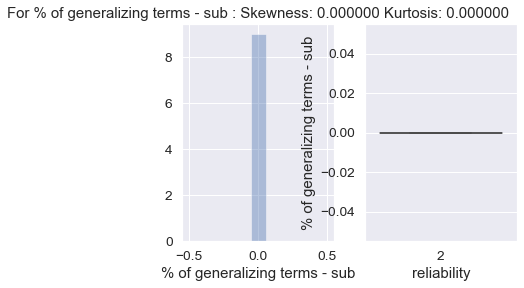

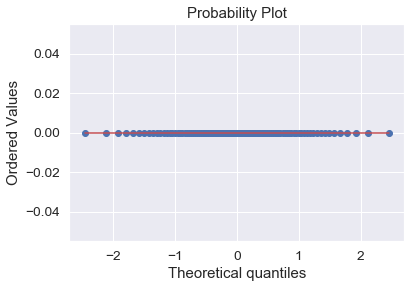

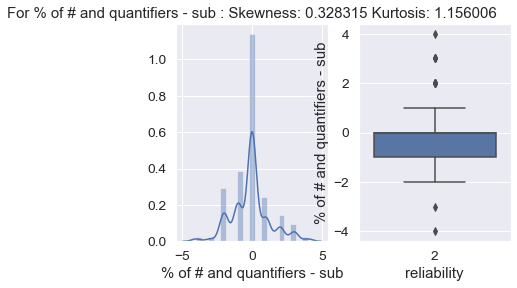

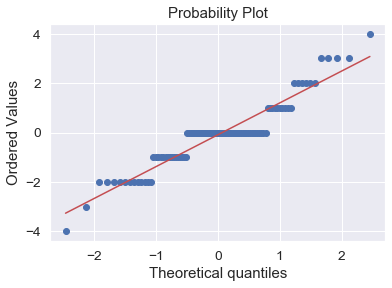

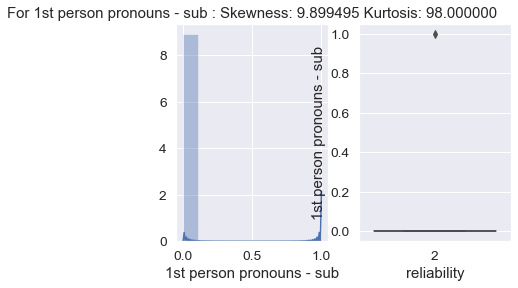

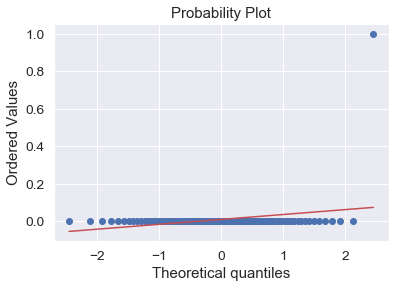

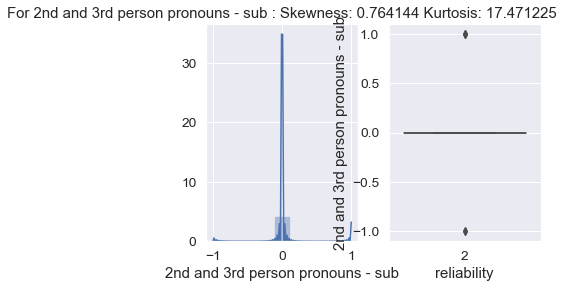

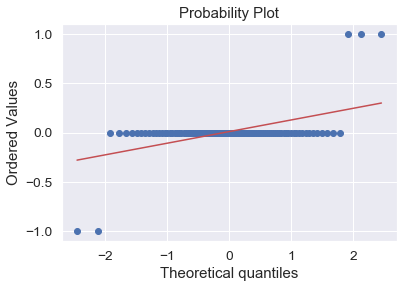

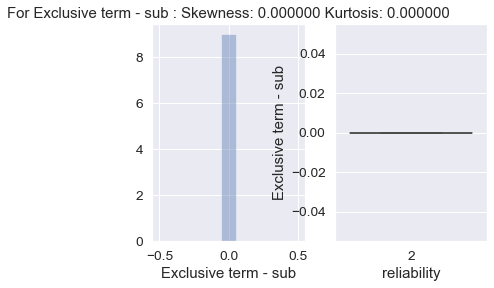

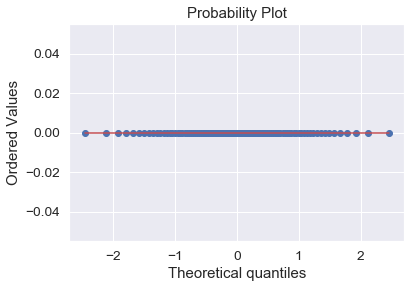

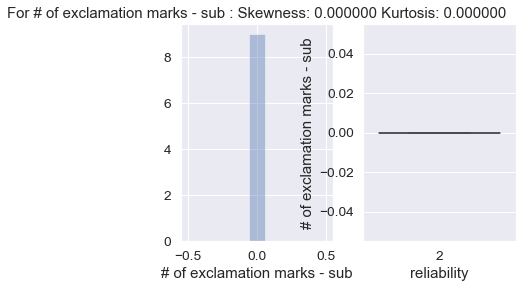

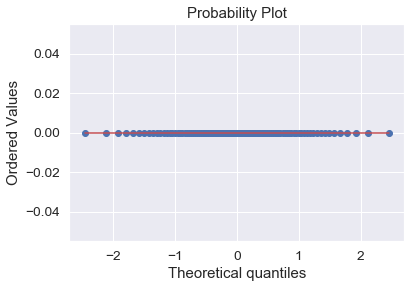

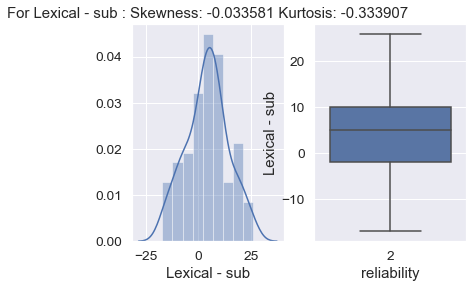

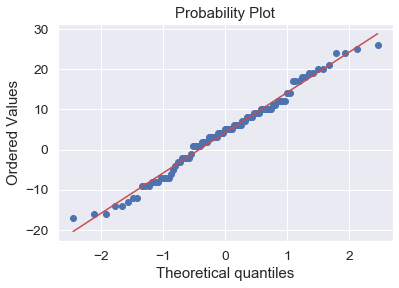

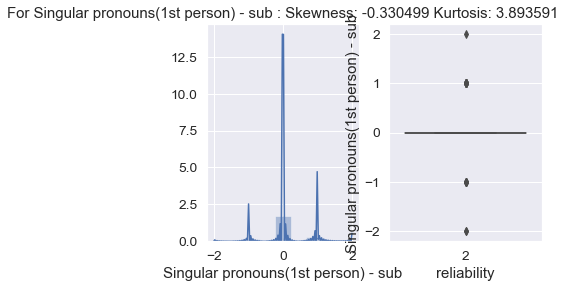

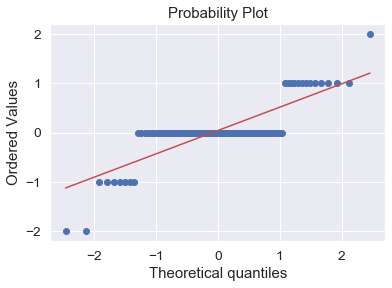

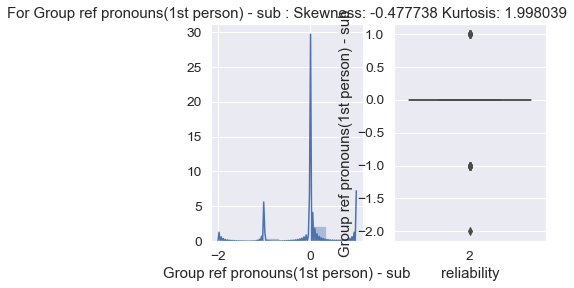

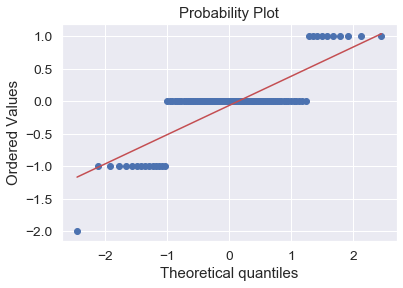

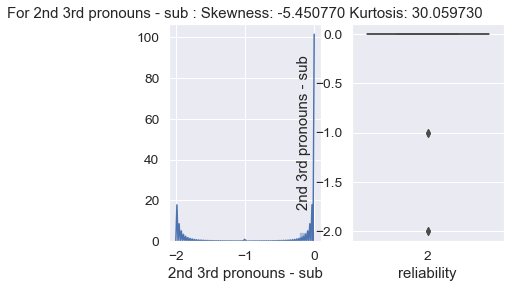

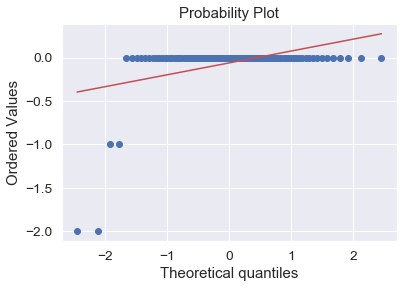

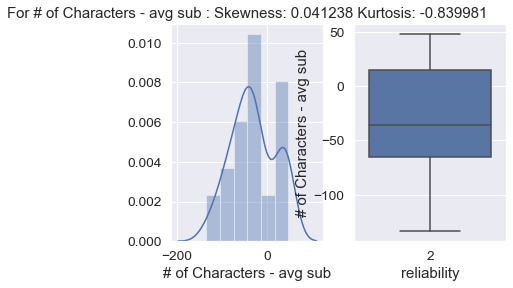

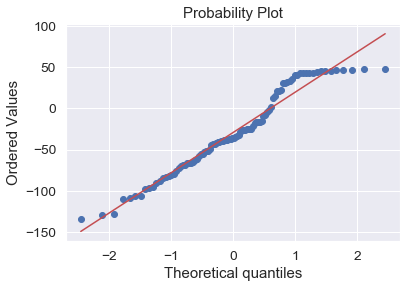

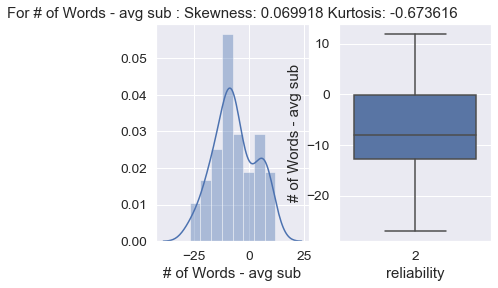

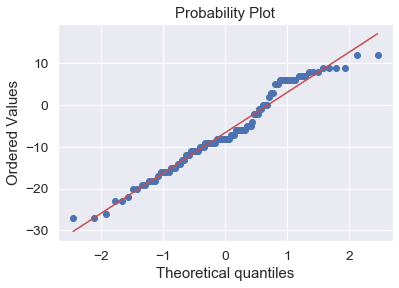

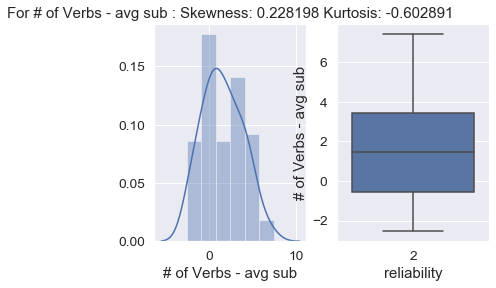

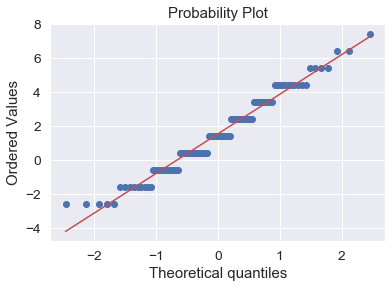

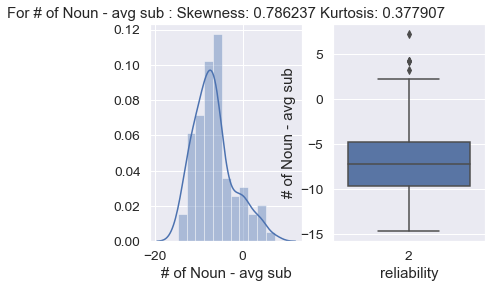

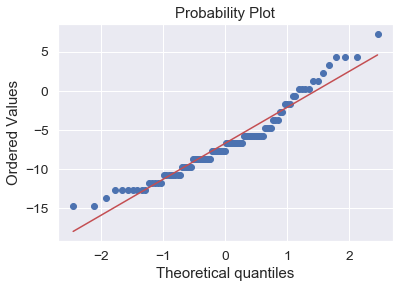

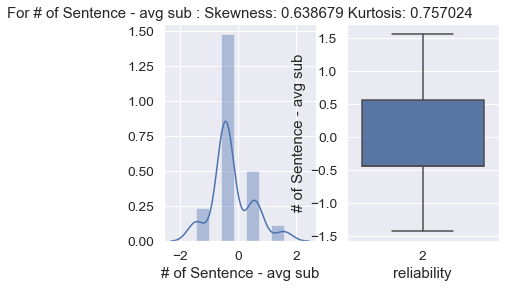

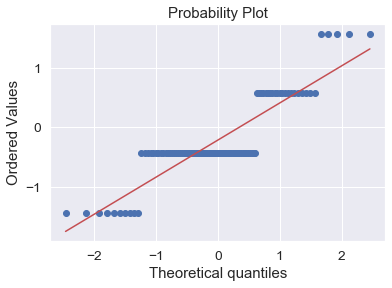

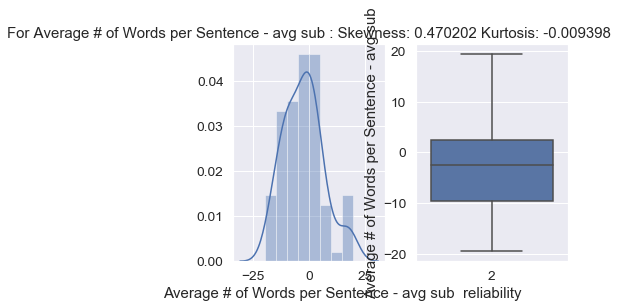

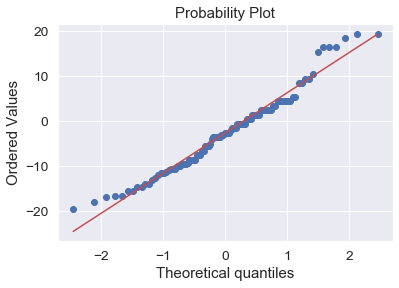

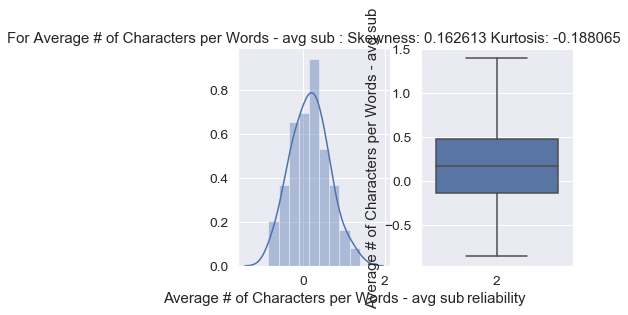

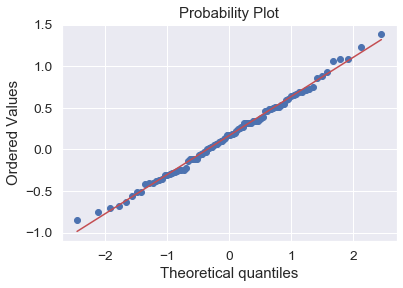

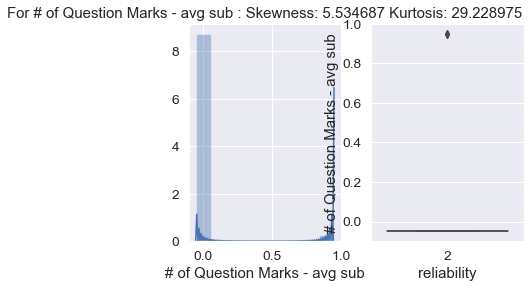

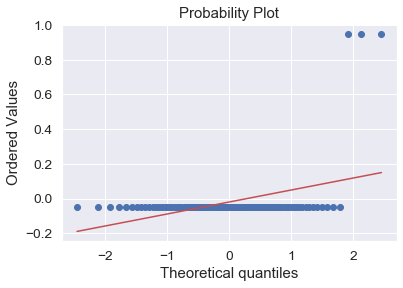

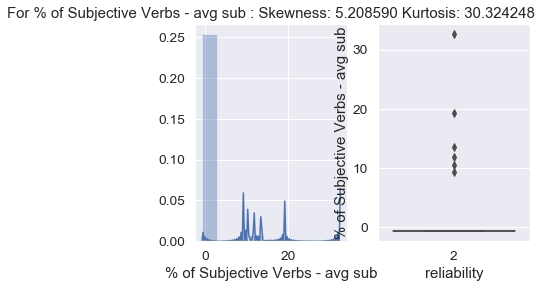

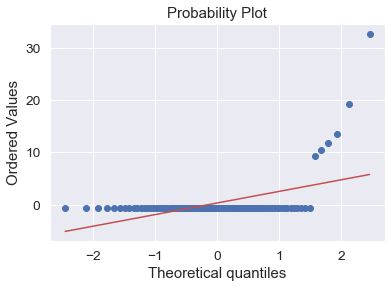

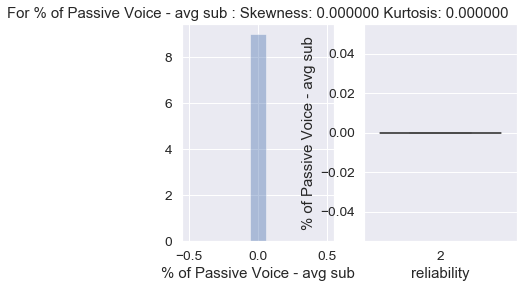

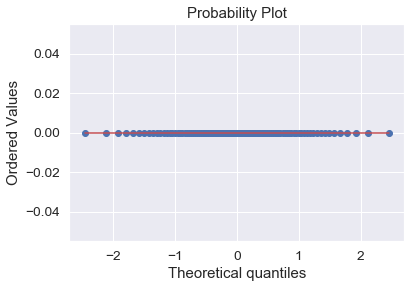

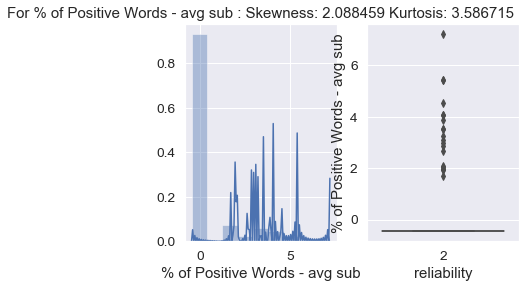

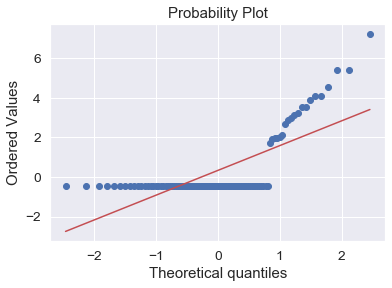

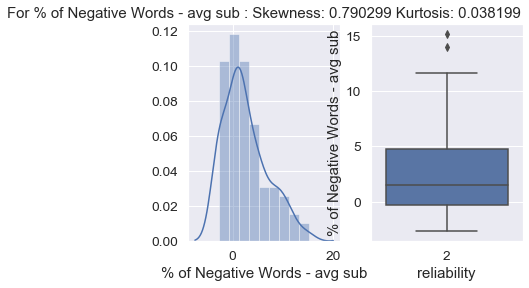

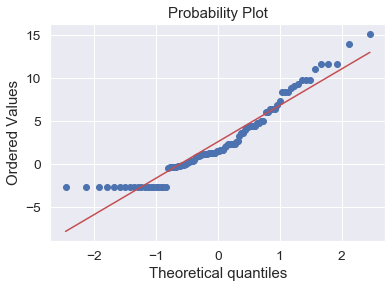

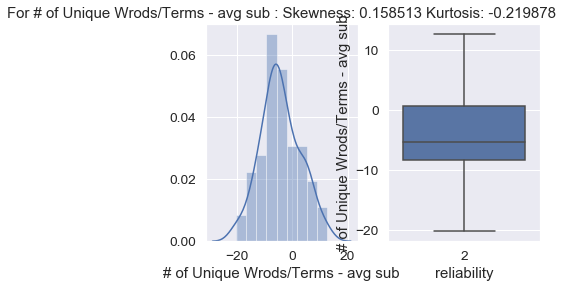

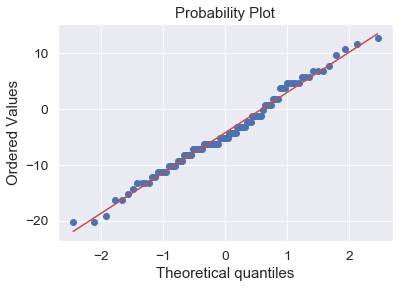

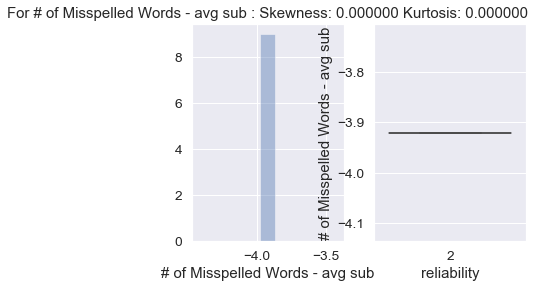

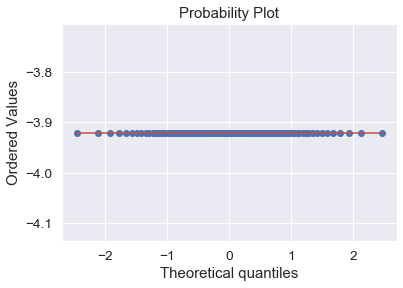

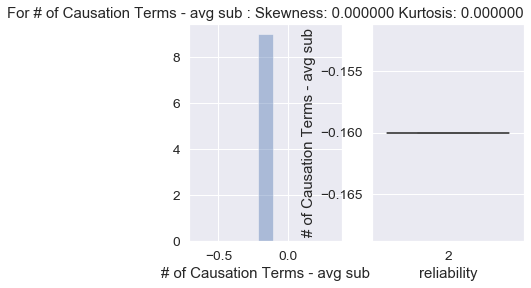

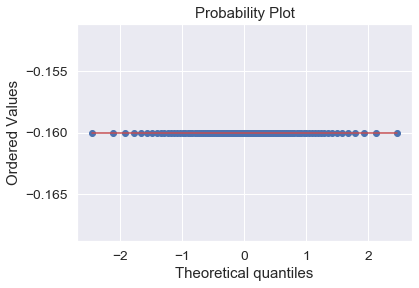

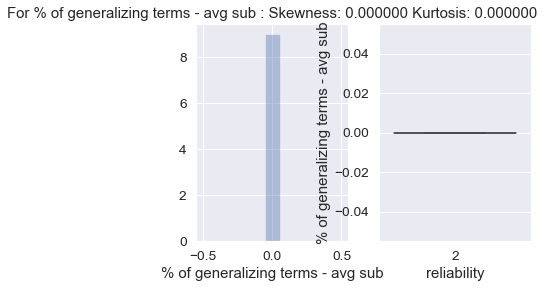

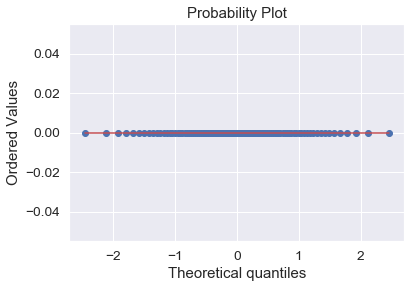

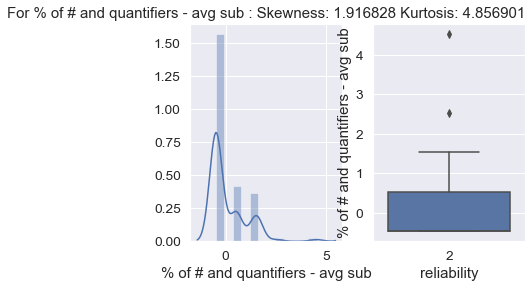

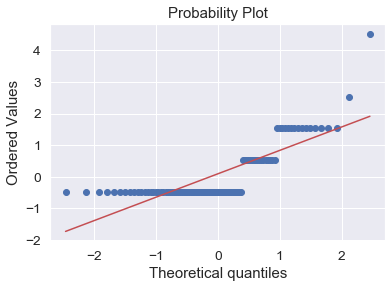

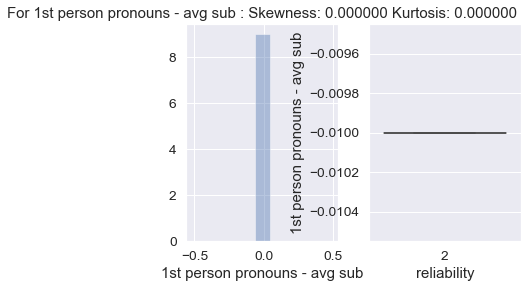

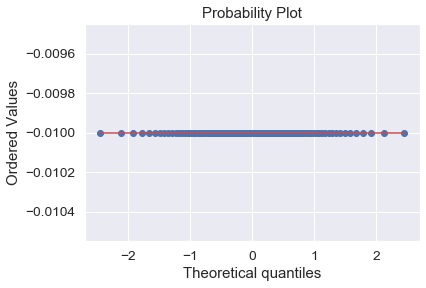

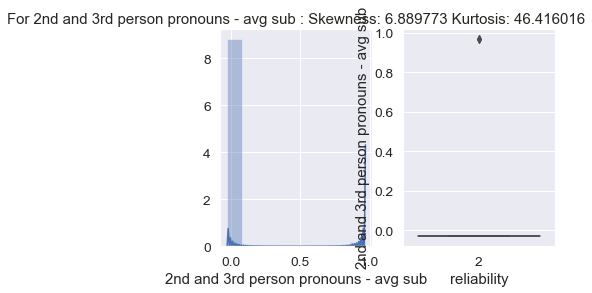

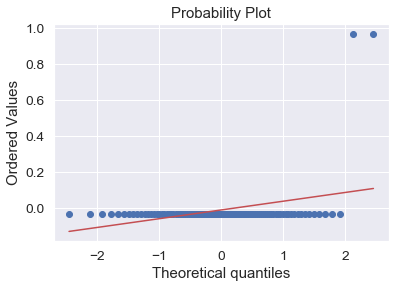

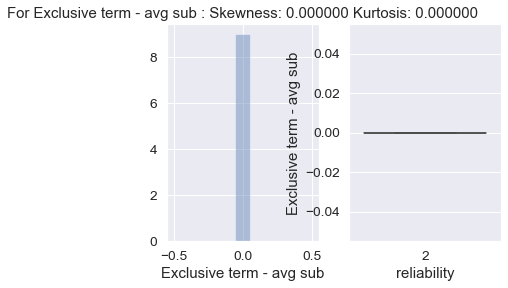

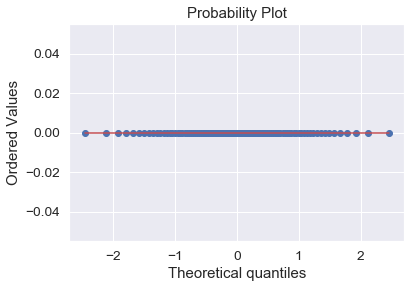

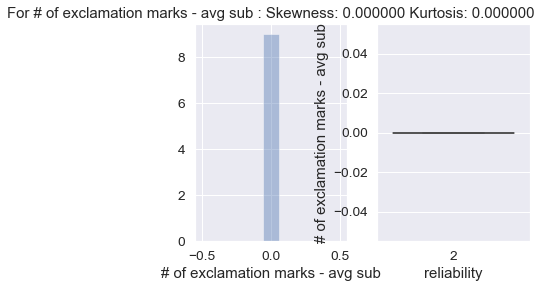

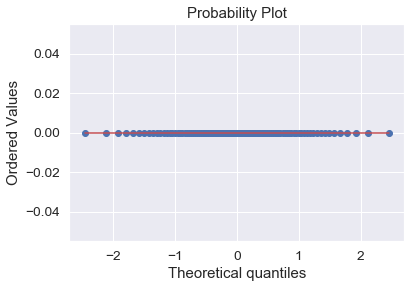

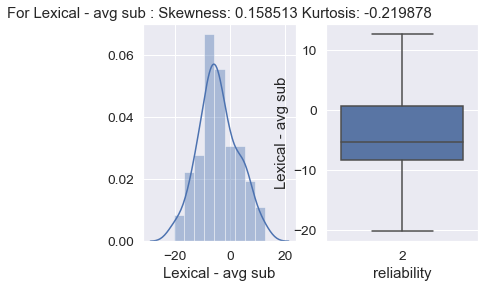

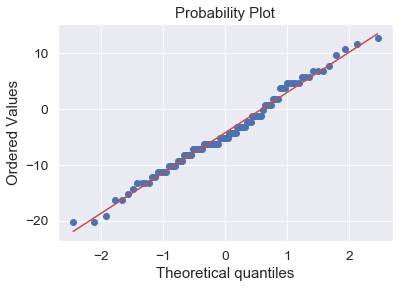

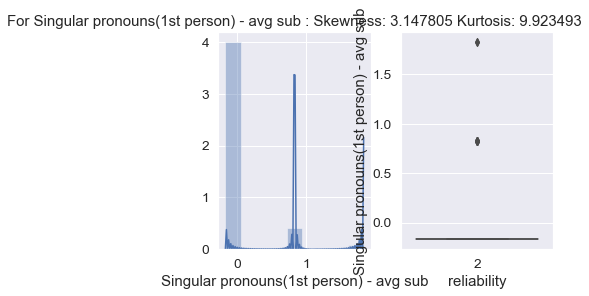

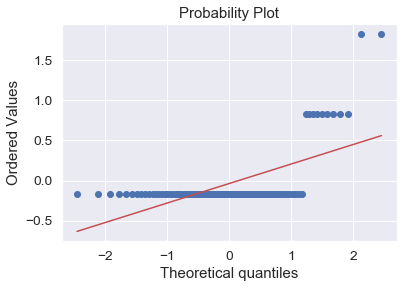

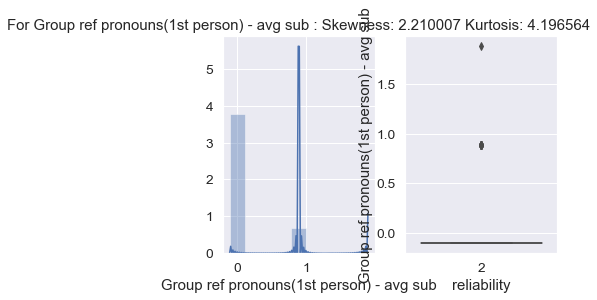

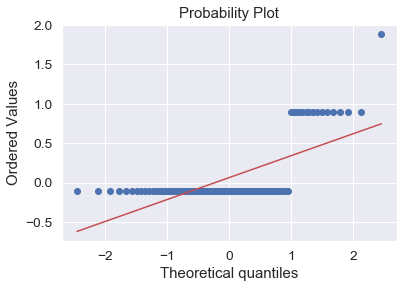

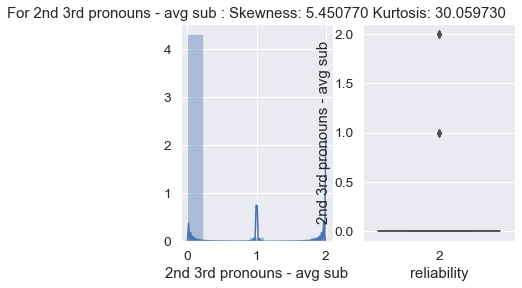

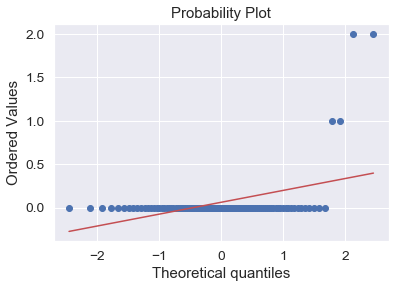

In [127]:
for var in feature_list_MSF:
    feature_distrib(var)

<h2> Bivariate analysis <!h2>

In [128]:
#bivariate analysis reliablity/x
def feature_scatter(feature):
    try:
        data = pd.concat([news_all['reliability'], news_all[var]], axis=1)
    except:
        data = pd.concat([news_multi['reliability'], news_multi[var]], axis=1)
    data.plot.scatter(x='reliability', y=var);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

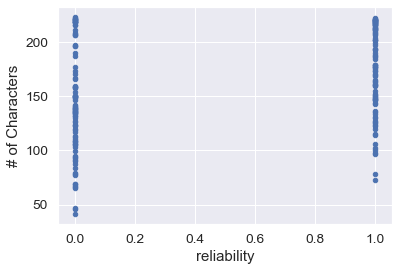

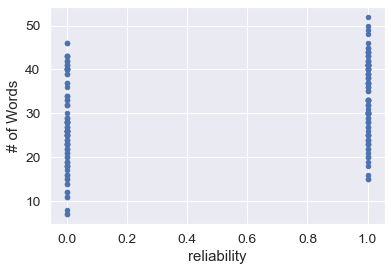

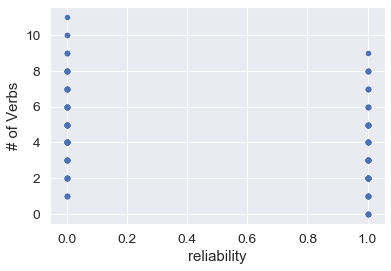

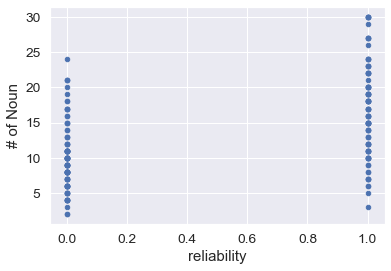

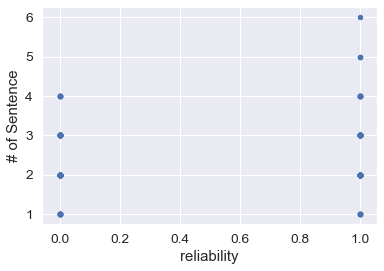

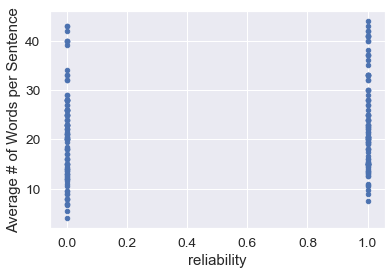

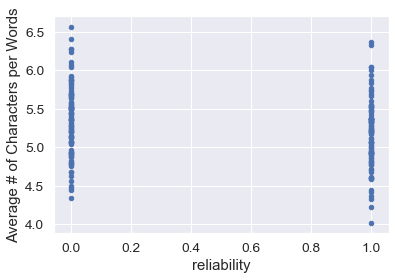

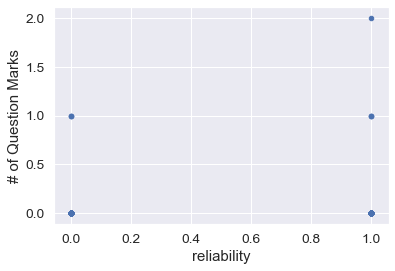

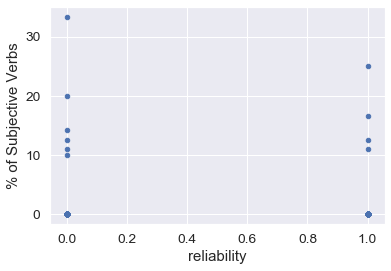

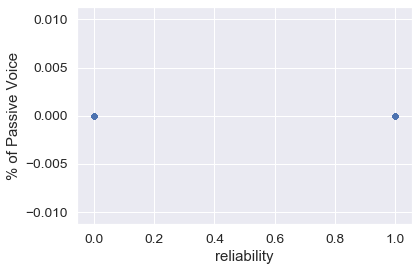

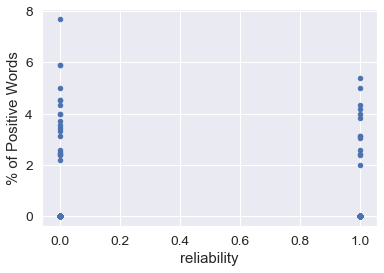

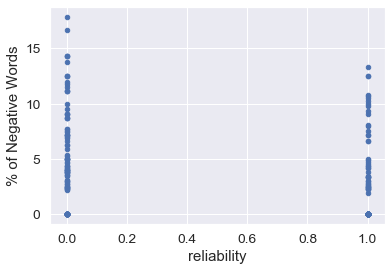

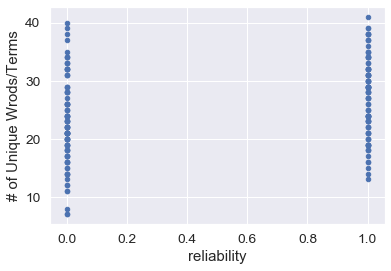

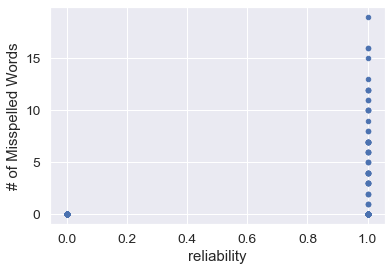

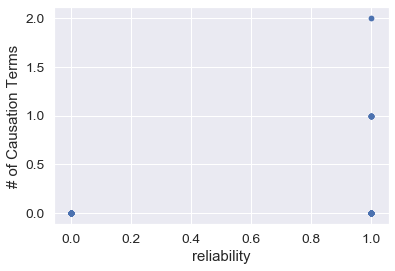

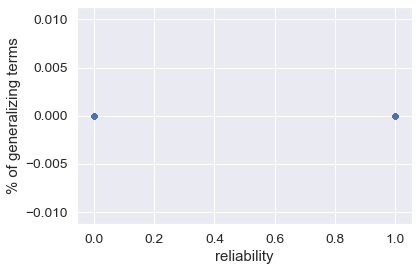

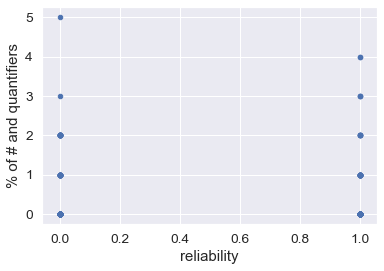

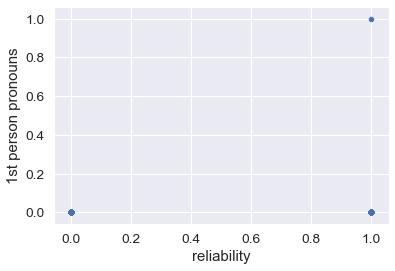

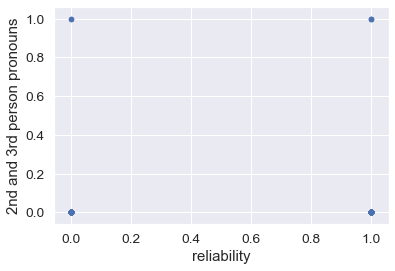

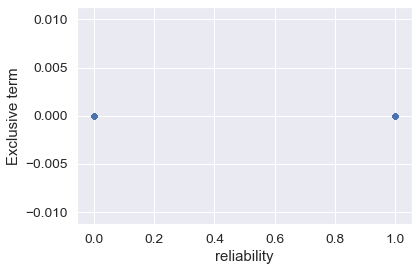

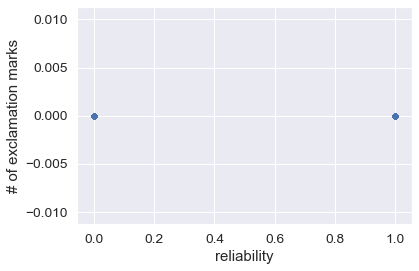

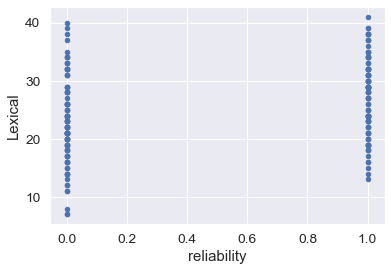

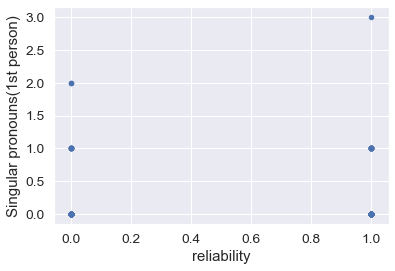

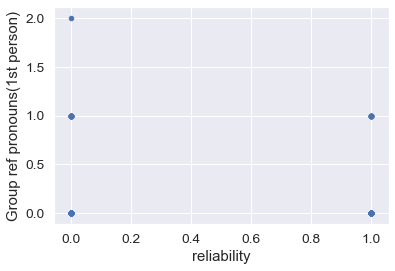

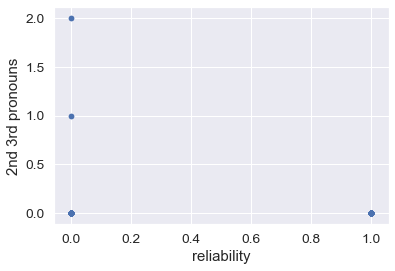

In [137]:
for var in feature_list_SSF:
    feature_scatter(var)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

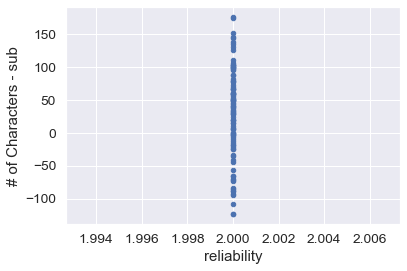

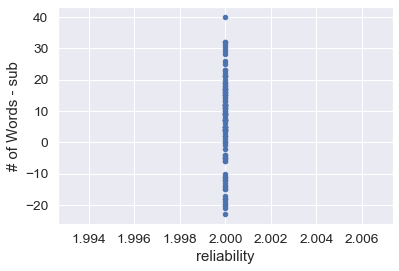

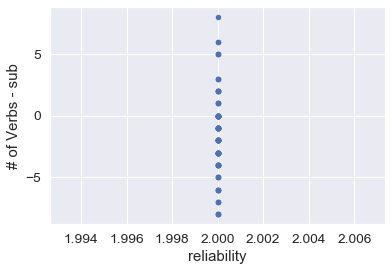

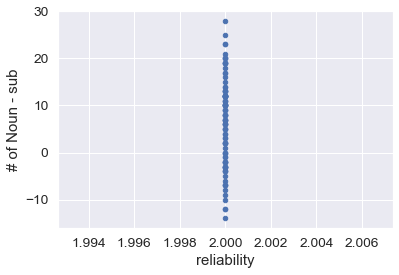

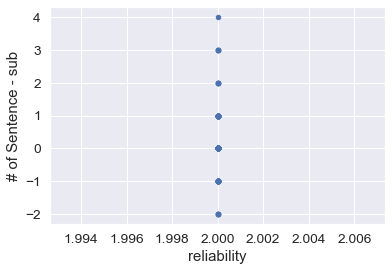

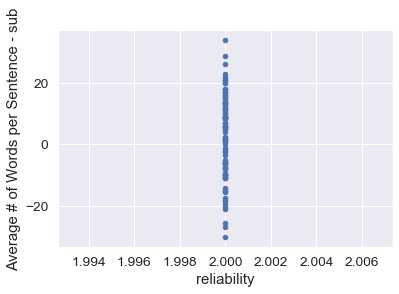

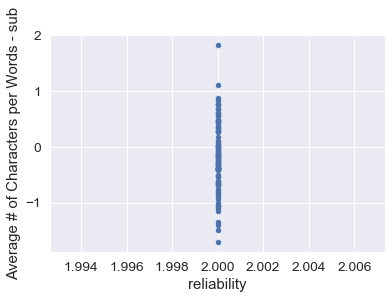

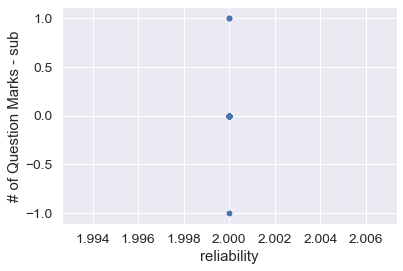

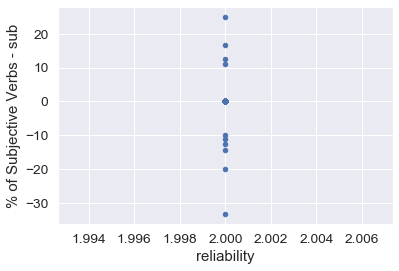

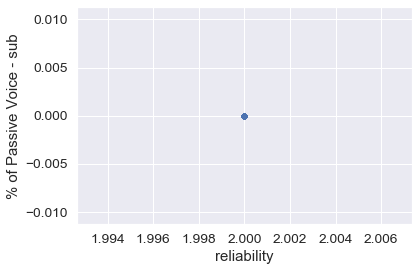

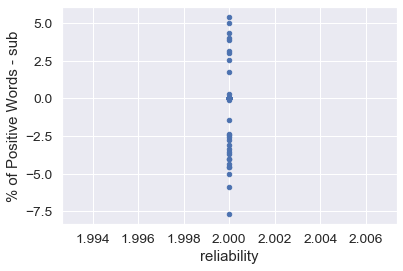

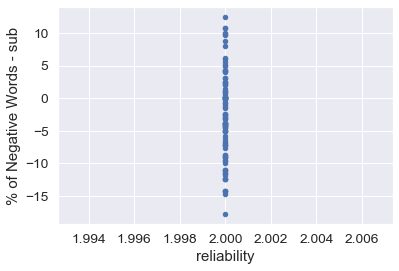

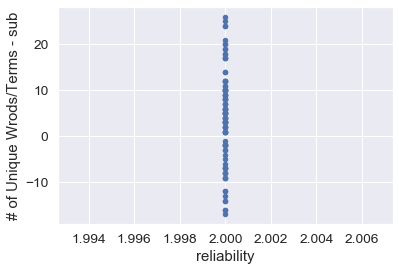

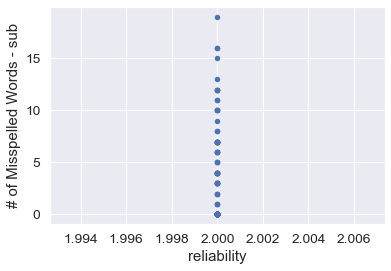

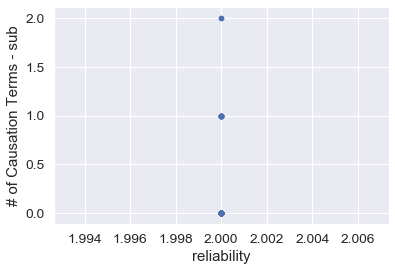

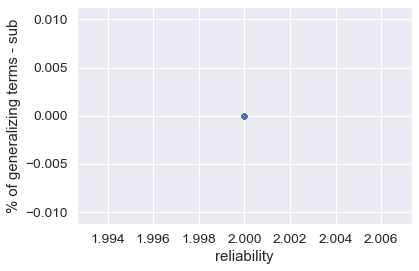

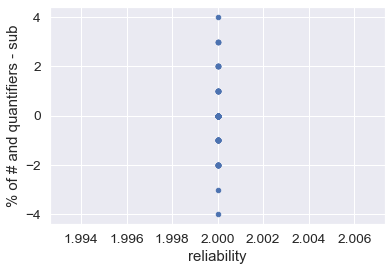

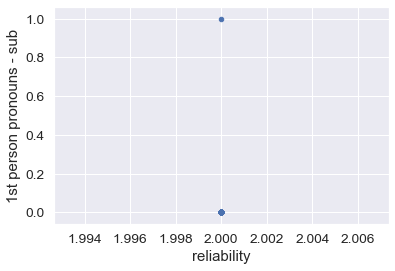

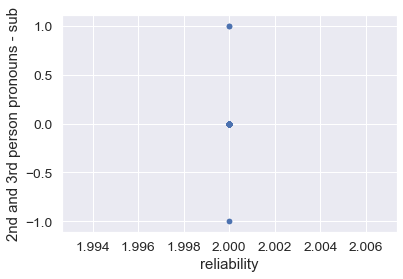

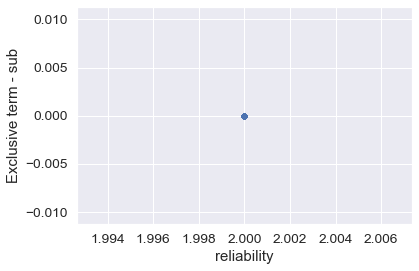

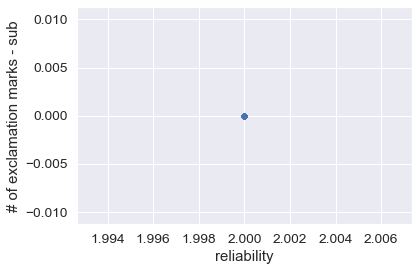

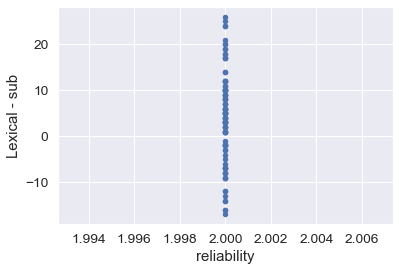

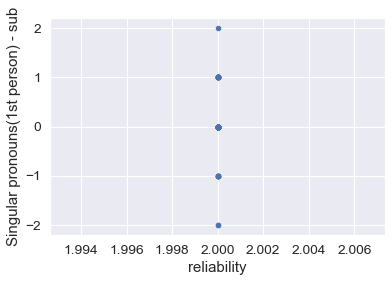

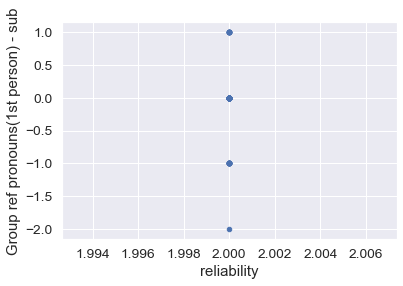

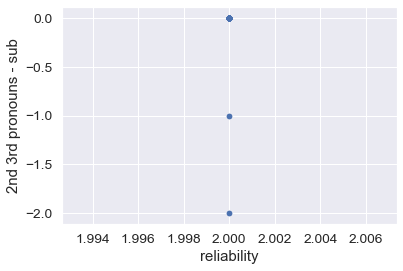

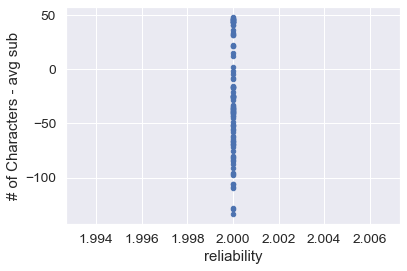

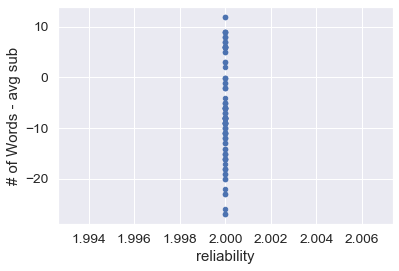

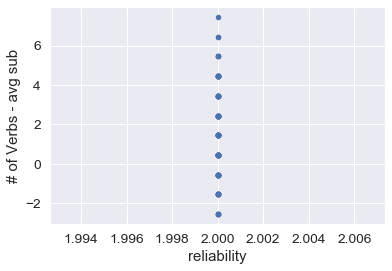

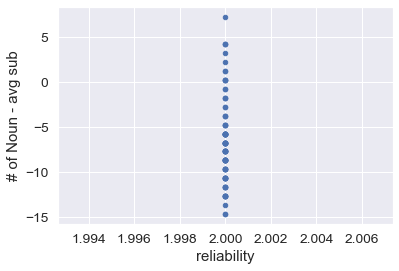

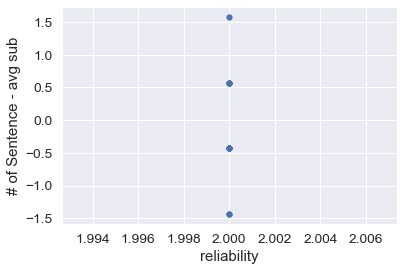

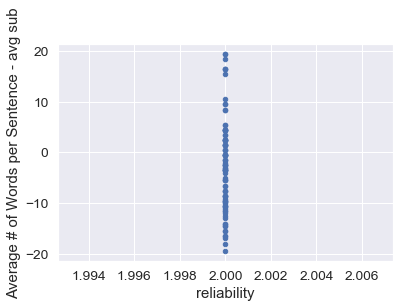

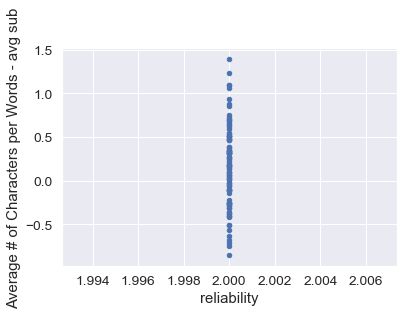

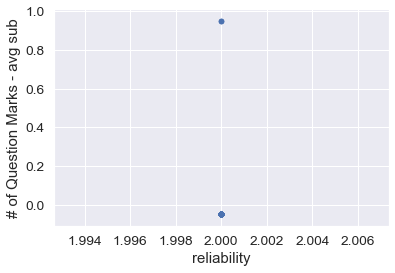

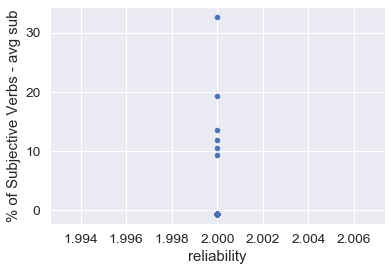

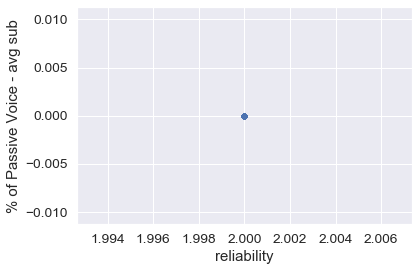

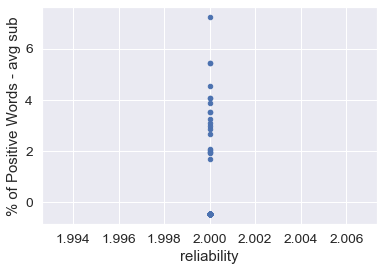

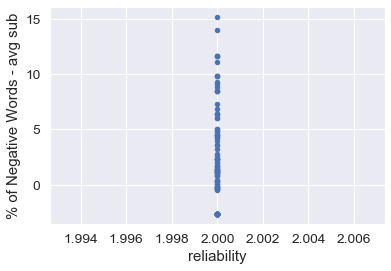

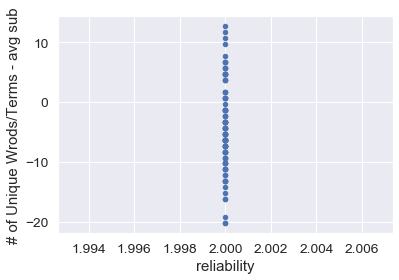

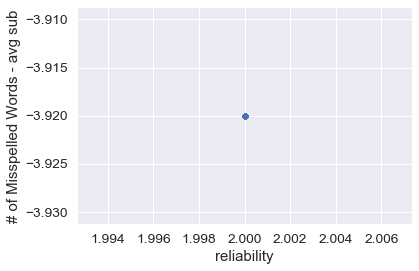

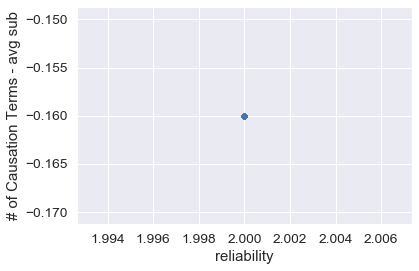

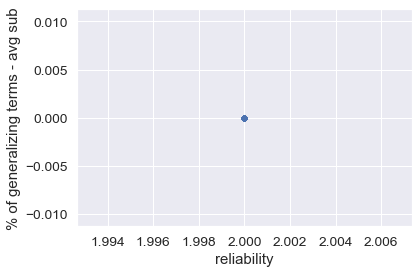

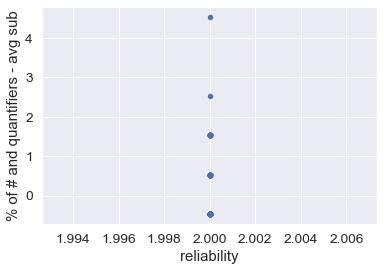

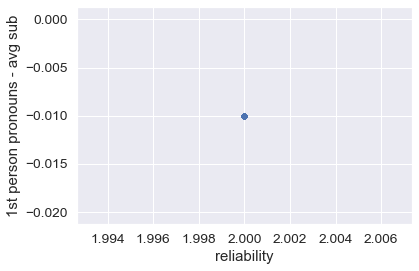

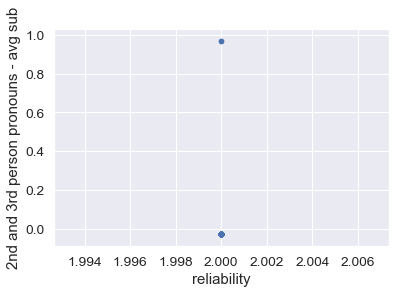

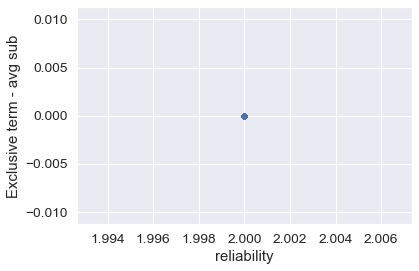

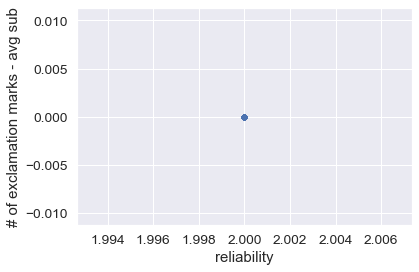

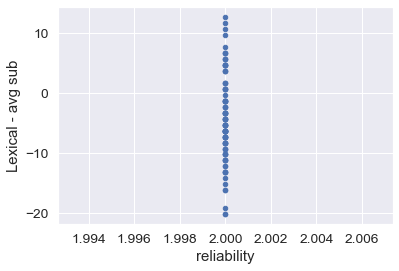

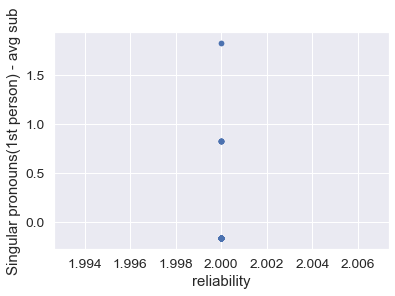

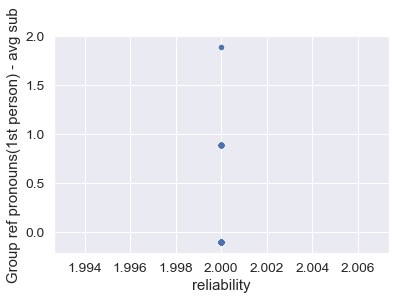

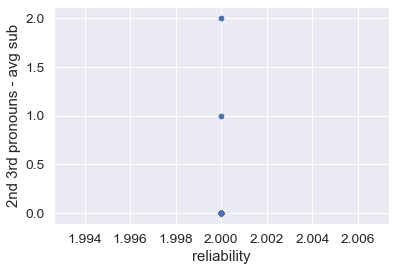

In [130]:
for var in feature_list_MSF:
    feature_scatter(var)

<h2>deeper analysis on selected features<!h2>

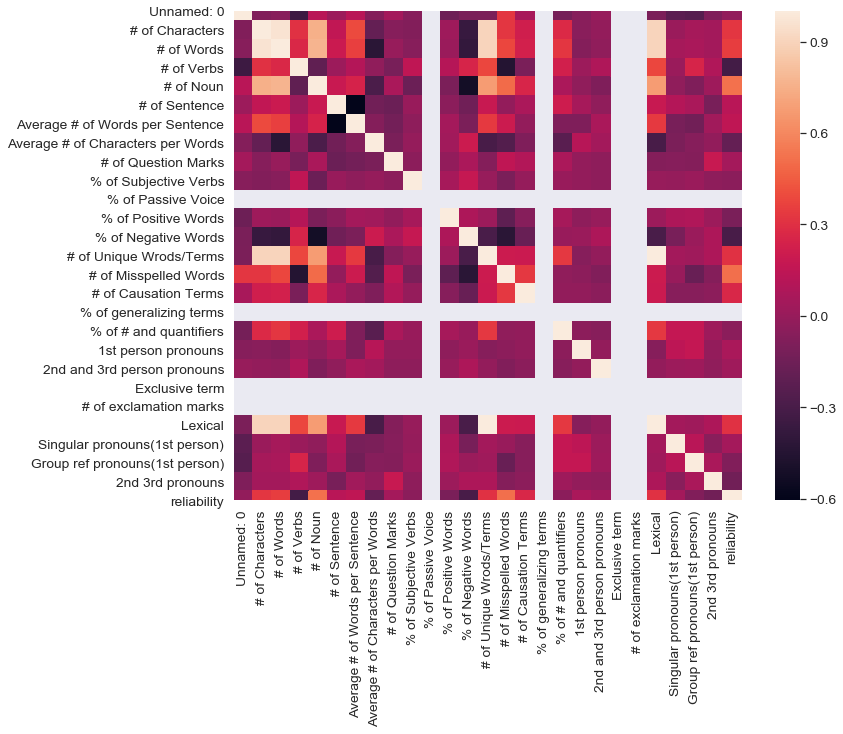

In [131]:
#correlation matrix to detect multicollinearity (one feature predict another linearly)
corrmat_SSF = news_all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_SSF, vmax=1, square=True);

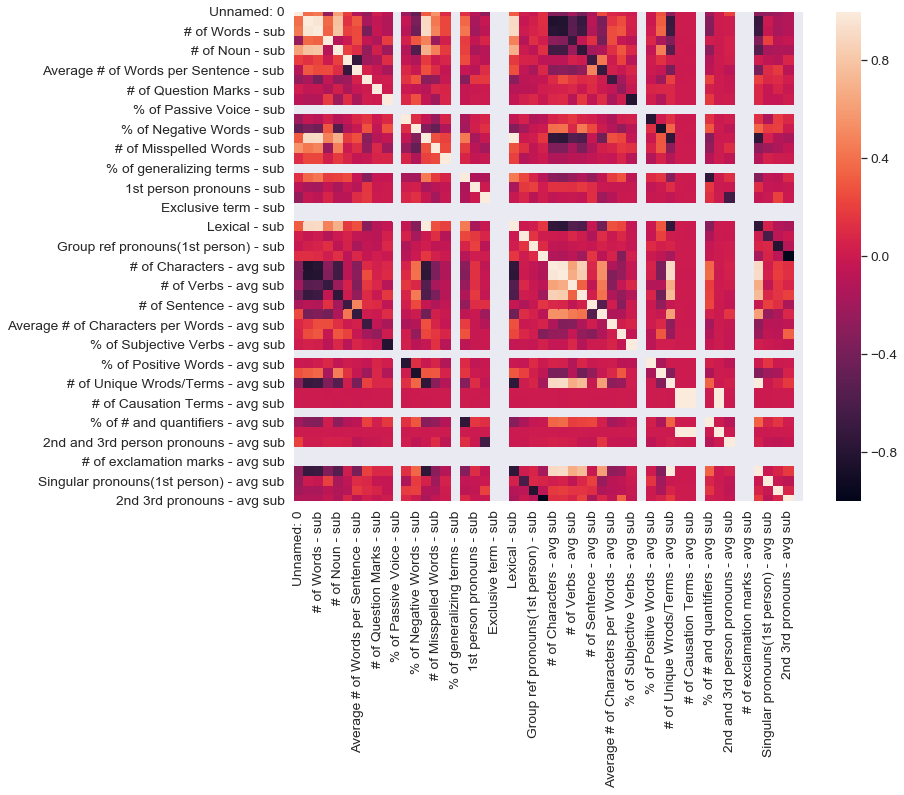

In [132]:
#correlation matrix to detect multicollinearity (one feature predict another linearly)
corrmat_MSF = news_multi.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_MSF, vmax=1, square=True);

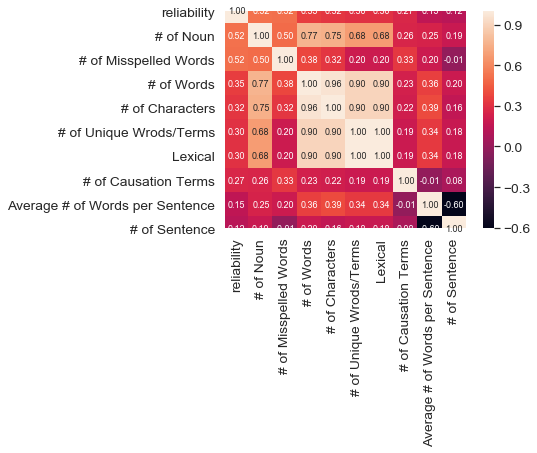

In [136]:
#correlation matrix
k = 10 #number of variables for heatmap
cols_SSF = corrmat_SSF.nlargest(k, 'reliability')['reliability'].index
cm_SSF = np.corrcoef(news_all[cols_SSF].values.T)
sns.set(font_scale=1.25)
hm_SSF = sns.heatmap(cm_SSF, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols_SSF.values, xticklabels=cols_SSF.values)
plt.show()

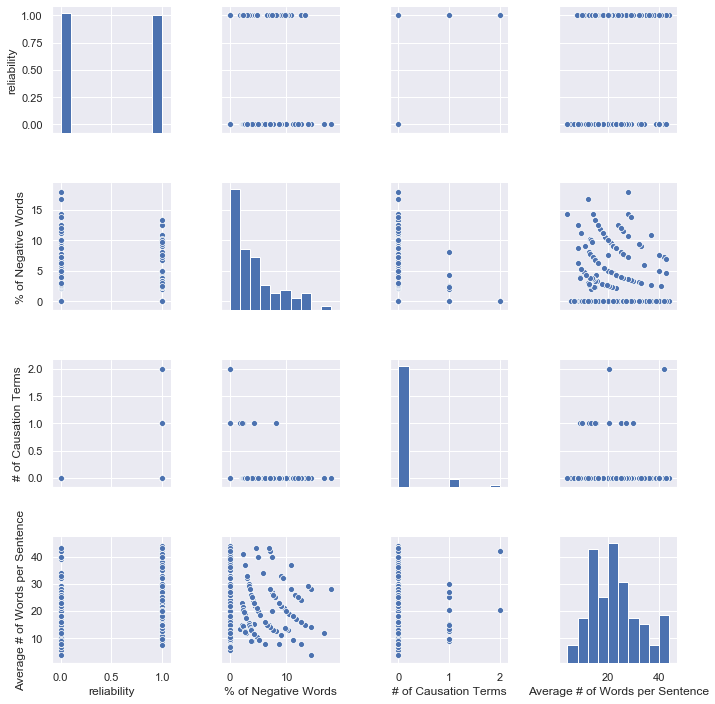

In [134]:
#scatterplot - SSF
sns.set()
cols = ['reliability', '% of Negative Words', '# of Causation Terms', 'Average # of Words per Sentence']
sns.pairplot(news_all[cols], size = 2.5)
plt.show();

In [147]:
#scatterplot - MSF
sns.set()
cols = ['reliability', '# of Characters - sub', '# of Words - sub', '# of Verbs - sub', '# of Noun - sub', '# of Sentence - sub', 'Average # of Characters per Words - sub', '% of Negative Words - sub',
       '# of Unique Words/Terms - sub', 'Lexical - sub', '# of Verbs - avg sub', 'Average # of Characters per Words - avg sub',
       '# of Unique Words/Terms - avg sub', 'Lexical - avg sub']
sns.pairplot(news_multi[cols], height = 10, size = 10)
plt.show();